## Clustering

In [228]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [229]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [230]:
df.describe()

,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,...,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,5.257779,0.196572,0.133731,0.369996,0.352873,0.234593,0.205544,0.291973,0.241509,0.111486,...,0.820077,0.764840,0.516008,0.048214,5.811328,5.817873,5.637948,3.927906,3.919467,0.907959
std,2.174417,0.253601,0.216103,0.081583,0.082620,0.193145,0.182558,0.356190,0.319638,0.211085,...,0.636115,0.685355,0.603205,0.182866,0.027122,0.032458,0.118370,0.076738,0.080766,0.289131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.739407,5.722931,5.442418,3.713572,3.663562,0.000000
25%,4.000000,0.000000,0.000000,0.321177,0.301493,0.045810,0.040422,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.795024,5.795024,5.564520,3.871201,3.871201,1.000000
50%,5.000000,0.060625,0.000000,0.371025,0.351289,0.223144,0.172771,0.128575,0.061543,0.000000,...,0.693147,0.693147,0.000000,0.000000,5.810362,5.817944,5.602119,3.931826,3.912023,1.000000
75%,7.000000,0.405465,0.223144,0.419121,0.405048,0.405465,0.323017,0.485508,0.405465,0.117783,...,1.386294,1.386294,1.098612,0.000000,5.832938,5.840351,5.707110,3.970292,3.970292,1.000000
max,9.000000,1.386294,1.386294,0.693147,0.693147,0.693147,0.693147,2.079442,2.079442,1.386294,...,2.397895,2.484907,2.639057,1.098612,5.904708,5.904708,5.942799,4.219508,4.189655,1.000000


### Clustering 1
Pada clustering ini pertanyaannya adalah cluster apa saja yang terbentuk dari tendensi para petarung memenangkan pertandingan mereka (TKO, Submission, Decision_majority, Decision_split, Decision_Unanimous, TKO_Doctor_stoppage)

In [6]:
features_to_keep = ["B_fighter", "R_fighter", "B_win_by_Decision_Majority", "R_win_by_Decision_Majority", "B_win_by_Decision_Split", "R_win_by_Decision_Split", "B_win_by_Decision_Unanimous", "R_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "R_win_by_KO/TKO", "B_win_by_Submission", "R_win_by_Submission"]

df_cluster = df[features_to_keep]

df_cluster.head()

,B_fighter,R_fighter,B_win_by_Decision_Majority,R_win_by_Decision_Majority,B_win_by_Decision_Split,R_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Unanimous,B_win_by_KO/TKO,R_win_by_KO/TKO,B_win_by_Submission,R_win_by_Submission
0,Al Iaquinta,Jorge Masvidal,0.000000,0.0,0.000000,0.000000,1.386294,1.609438,1.386294,0.000000,0.000000,0.693147
1,Johny Hendricks,Josh Koscheck,0.693147,0.0,0.693147,0.693147,0.693147,1.791759,1.609438,1.945910,0.000000,1.386294
2,Manvel Gamburyan,John Dodson,0.000000,0.0,0.000000,0.000000,1.386294,1.098612,0.000000,1.386294,1.386294,0.000000
3,Katsunori Kikuno,Tony Ferguson,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147
4,Viscardi Andrade,Richard Walsh,0.000000,0.0,0.000000,0.000000,0.693147,1.098612,0.693147,0.000000,0.000000,0.000000


In [7]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission']]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission']]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000


In [8]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,6042.0,0.018490,0.112355,0.0,0.0,0.000000,0.000000,1.098612
win_by_Decision_Split,6042.0,0.243238,0.385693,0.0,0.0,0.000000,0.693147,1.791759
win_by_Decision_Unanimous,6042.0,0.725908,0.623313,0.0,0.0,0.693147,1.098612,2.397895
win_by_KO/TKO,6042.0,0.680393,0.663621,0.0,0.0,0.693147,1.098612,2.484907
win_by_Submission,6042.0,0.460283,0.580783,0.0,0.0,0.000000,0.693147,2.708050


Karena jarang Fighter yang memenangkan pertandingannya dengan Decision Majority dan Decision Split, drop kolom tersebut. Karena jika ada fighter yang memenangkan pertandingannya dengan cara tersebut, fighter tersebut termasuk outlier dan ini dapat merusak clustering.

In [9]:
# Drop columns
features_to_drop = ['win_by_Decision_Majority', 'win_by_Decision_Split']

df_fighter = df_fighter.drop(features_to_drop, axis=1)

df_fighter.columns

Index(['fighter', 'win_by_Decision_Unanimous', 'win_by_KO/TKO',
       'win_by_Submission'],
      dtype='object')

In [10]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,6042.0,0.725908,0.623313,0.0,0.0,0.693147,1.098612,2.397895
win_by_KO/TKO,6042.0,0.680393,0.663621,0.0,0.0,0.693147,1.098612,2.484907
win_by_Submission,6042.0,0.460283,0.580783,0.0,0.0,0.000000,0.693147,2.708050


In [11]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

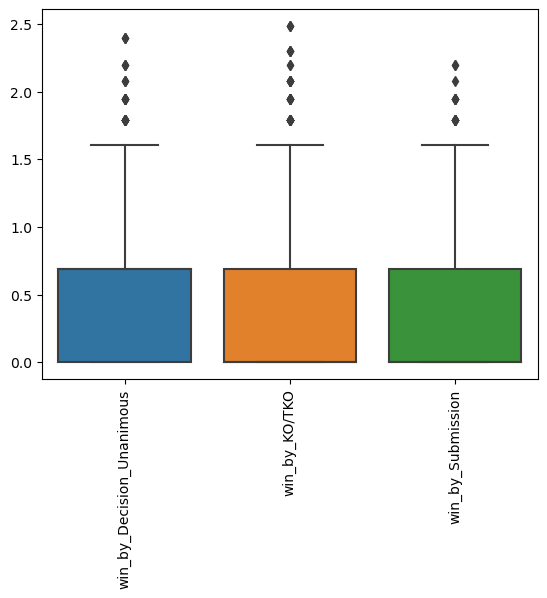

In [12]:
# Check outliers
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()


In [13]:
df_fighter.shape

(1251, 4)

In [14]:
# Filter outliers
df_fighter = df_fighter[df_fighter['win_by_Decision_Unanimous'] < 1.6]
df_fighter = df_fighter[df_fighter['win_by_KO/TKO'] < 1.6]
df_fighter = df_fighter[df_fighter['win_by_Submission'] < 1.6]

df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,1098.0,0.391196,0.454495,0.0,0.0,0.0,0.693147,1.386294
win_by_KO/TKO,1098.0,0.316478,0.437630,0.0,0.0,0.0,0.693147,1.386294
win_by_Submission,1098.0,0.241533,0.407138,0.0,0.0,0.0,0.693147,1.386294


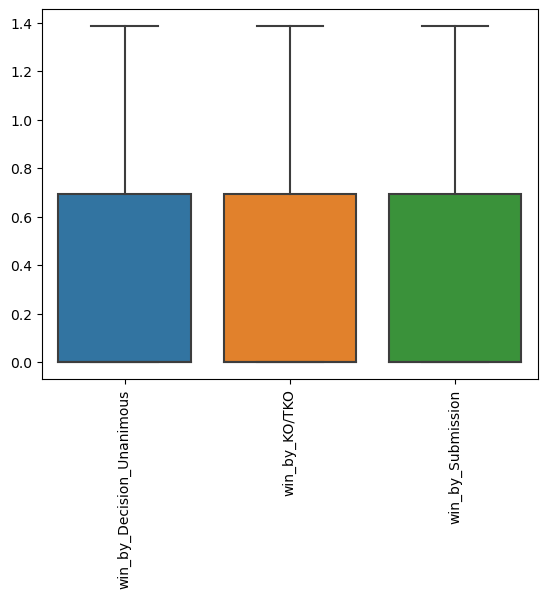

In [15]:
# Check outliers
sns.boxplot(data=df_fighter)   
plt.xticks(rotation=90)
plt.show()

In [16]:
df_fighter.shape

(1098, 4)

In [17]:
# Change index with range
df_fighter.reset_index(drop=True, inplace=True)
df_fighter.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,1.386294,1.386294,0.000000
1,Manvel Gamburyan,1.386294,0.000000,1.386294
2,Katsunori Kikuno,0.693147,0.000000,0.000000
3,Viscardi Andrade,0.693147,0.693147,0.000000
4,Alexandre Pantoja,0.693147,0.000000,1.098612


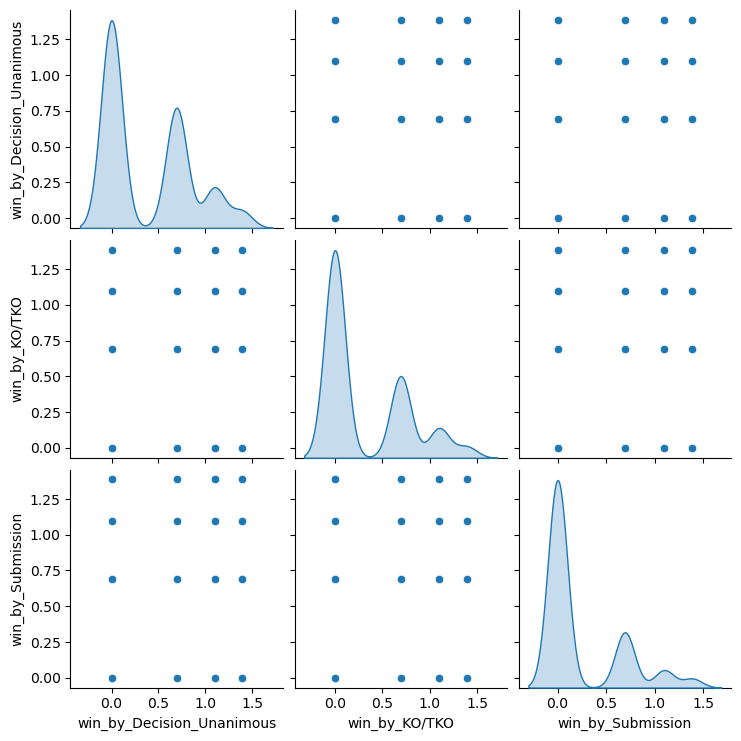

In [18]:
# Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [19]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [21]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


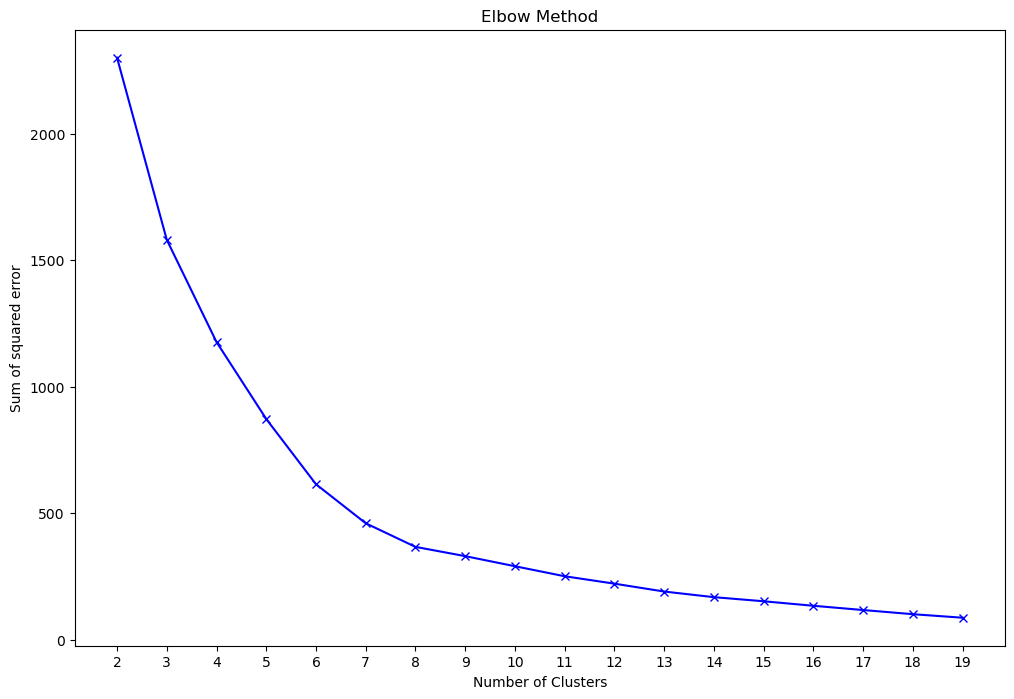

In [22]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 20), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.xticks(range(2, 20))
plt.show()

Dapat dilihat dari plot di atas "Elbow" terletak di K=8

For n_clusters = 2 The average silhouette_coefficient is : 0.3929946775795137
For n_clusters = 3 The average silhouette_coefficient is : 0.45069114043266867
For n_clusters = 4 The average silhouette_coefficient is : 0.5092373982339748
For n_clusters = 5 The average silhouette_coefficient is : 0.6071106486935405
For n_clusters = 6 The average silhouette_coefficient is : 0.6730783022587813
For n_clusters = 7 The average silhouette_coefficient is : 0.7081907987020378
For n_clusters = 8 The average silhouette_coefficient is : 0.7395043317488784
For n_clusters = 9 The average silhouette_coefficient is : 0.7389078753538196
For n_clusters = 10 The average silhouette_coefficient is : 0.772561699281251
For n_clusters = 11 The average silhouette_coefficient is : 0.8007605924932796
For n_clusters = 12 The average silhouette_coefficient is : 0.8033182269861934
For n_clusters = 13 The average silhouette_coefficient is : 0.8126020842700401
For n_clusters = 14 The average silhouette_coefficient is : 

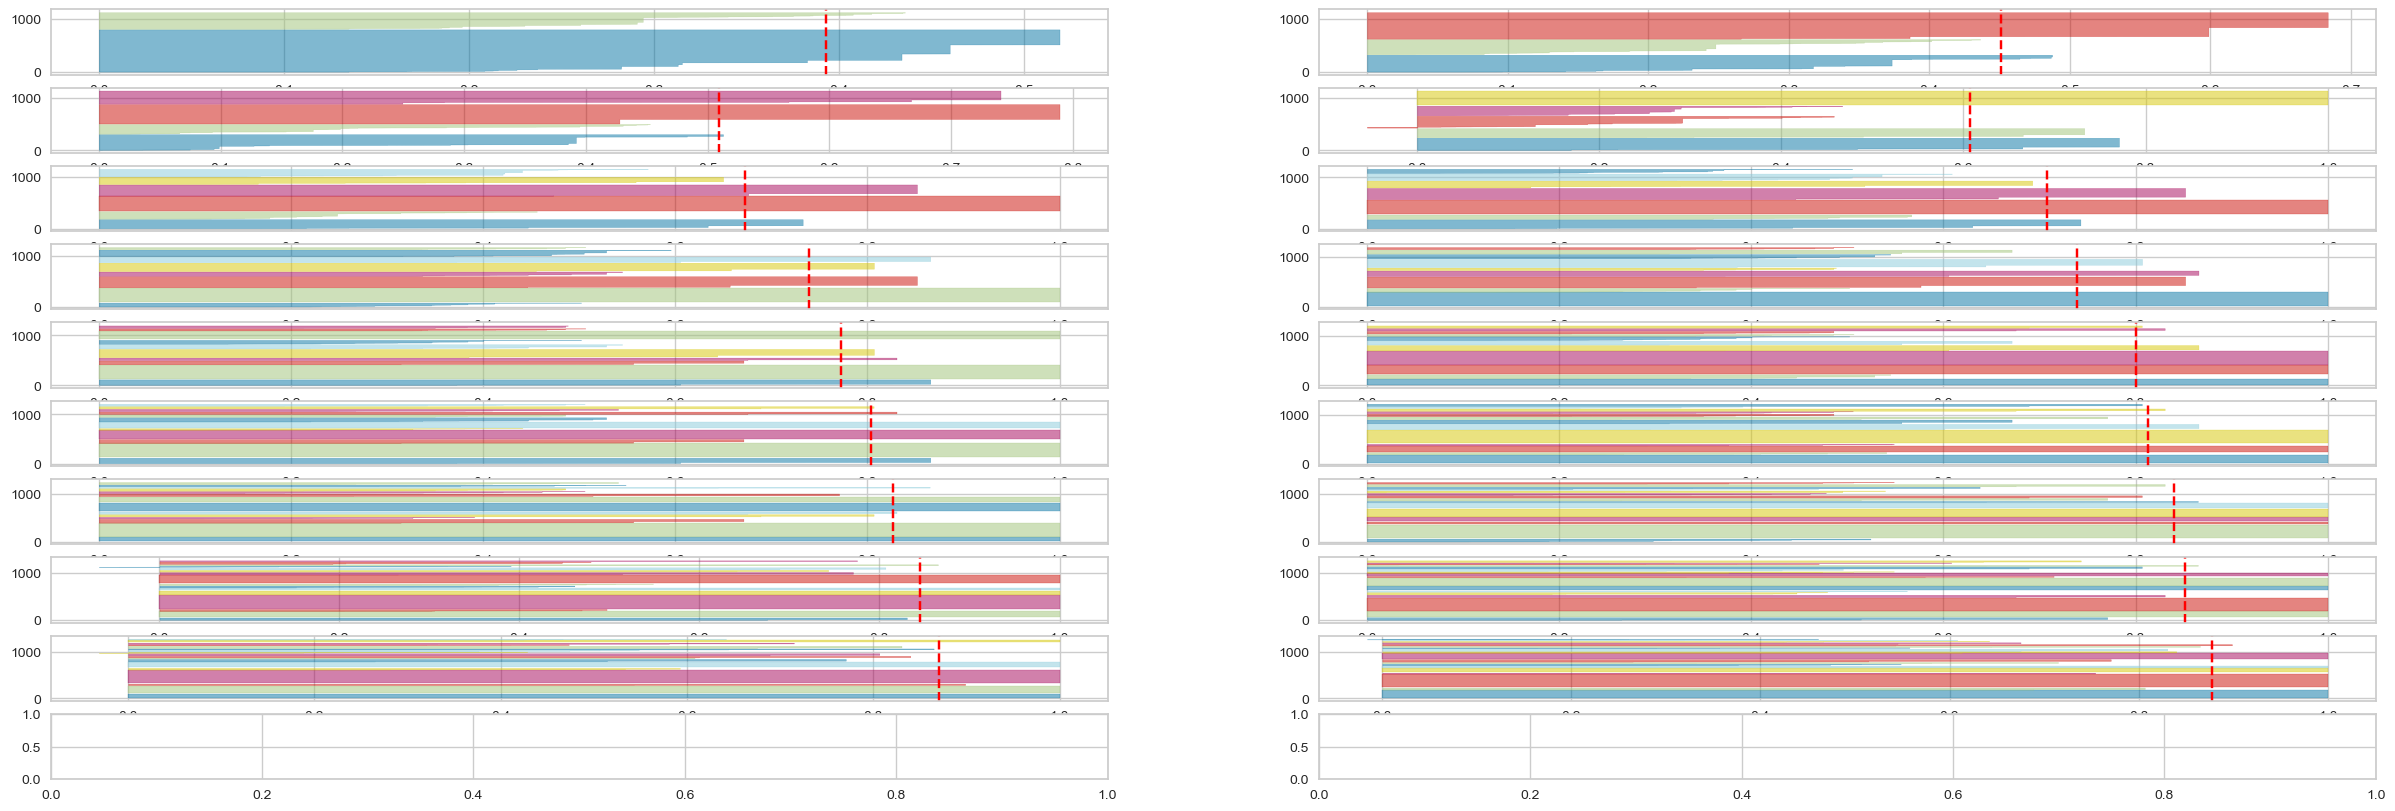

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [i for i in range(2, 20)]

silhouette_avg_list = []

fig, ax = plt.subplots(10, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_fighter_scaled)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

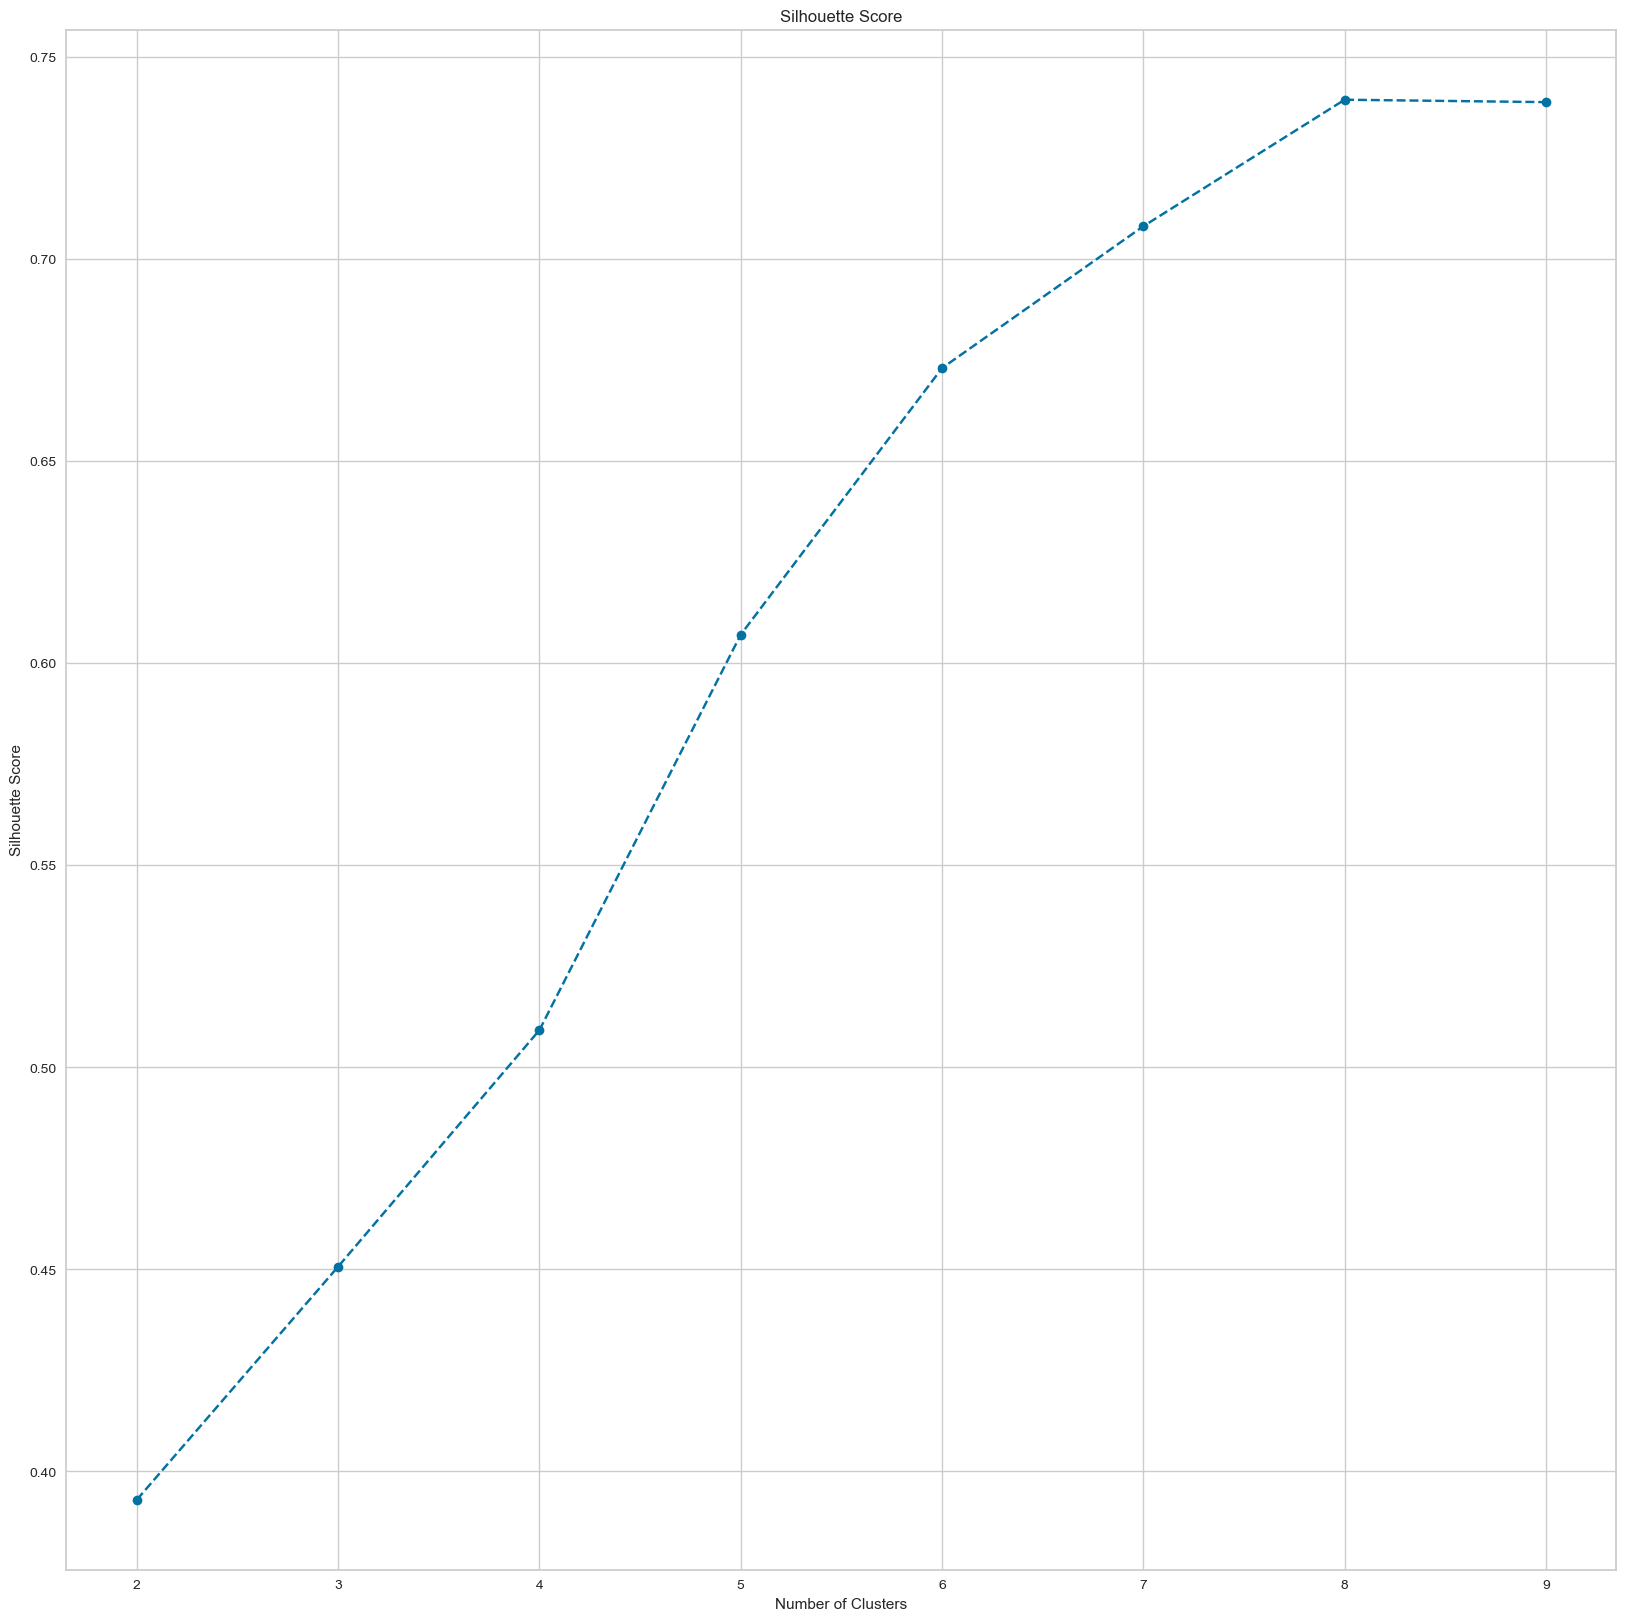

In [51]:
plt.figure(figsize=(20, 20))
plt.plot(*zip(*silhouette_avg_list[:8]), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.title('Silhouette Score')

plt.show()

In [25]:
# PCA to 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_fighter_pca = pca.fit_transform(df_fighter_scaled)

# Create a new dataframe with the PCA scores
df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['PC1', 'PC2'])

df_fighter_pca.head()

,PC1,PC2
0,2.383915,-2.167653
1,2.628066,2.464551
2,-0.243339,0.158169
3,0.559205,-1.022069
4,1.222148,1.958471


In [26]:
# Add cluster labels to df_fighter
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_fighter_scaled)
df_fighter_pca['cluster'] = kmeans.labels_

df_fighter_pca.head()

,PC1,PC2,cluster
0,2.383915,-2.167653,6
1,2.628066,2.464551,3
2,-0.243339,0.158169,2
3,0.559205,-1.022069,6
4,1.222148,1.958471,3


In [27]:
# Count each cluster
df_fighter_pca['cluster'].value_counts()

1    281
2    217
4    163
6    127
5    109
3     84
0     77
7     40
Name: cluster, dtype: int64

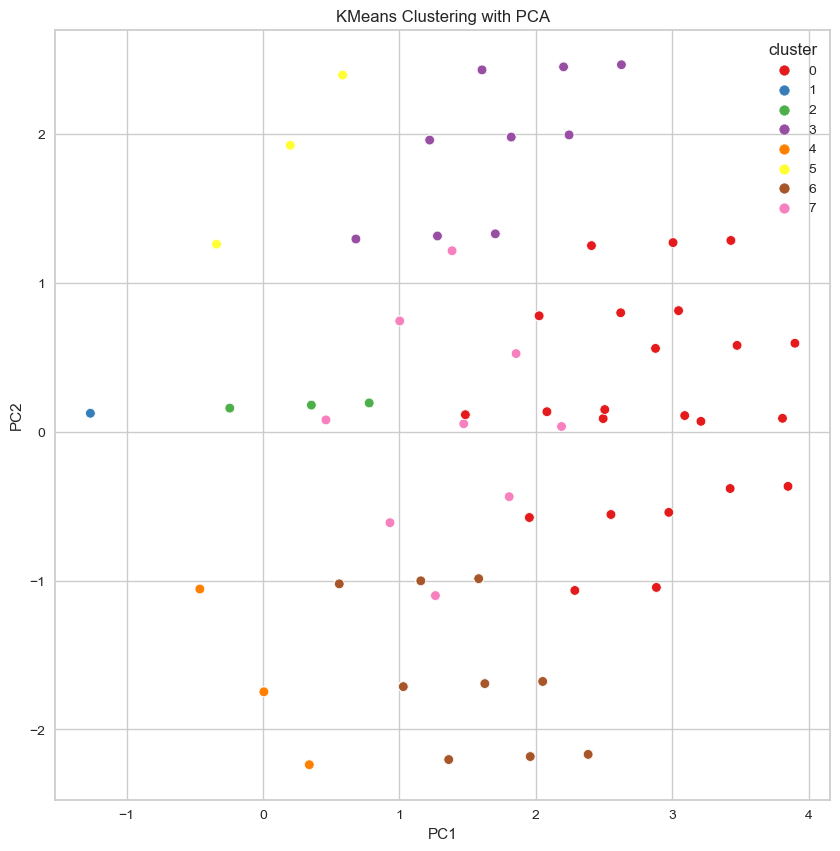

In [28]:
# Plot PCA
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("KMeans Clustering with PCA")
plt.show()


### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(df_fighter_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters


19

In [30]:
# Add cluster labels to df_fighter
db_scan_cluster = df_fighter_scaled.copy()

db_scan_cluster.head()


,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,2.190456,2.445682,-0.593517
1,2.190456,-0.723493,2.813011
2,0.664668,-0.723493,-0.593517
3,0.664668,0.861095,-0.593517
4,0.664668,-0.723493,2.106092


In [31]:
# PCA to 2 components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(db_scan_cluster)
db_scan_cluster_pca = pca.transform(db_scan_cluster)
db_scan_cluster_pca = pd.DataFrame(db_scan_cluster_pca, columns=['pca1', 'pca2'])

# Add cluster labels to df_fighter
db_scan_cluster_pca['cluster'] = labels

db_scan_cluster_pca.head()


,pca1,pca2,cluster
0,2.383915,-2.167653,-1
1,2.628066,2.464551,-1
2,-0.243339,0.158169,0
3,0.559205,-1.022069,1
4,1.222148,1.958471,-1


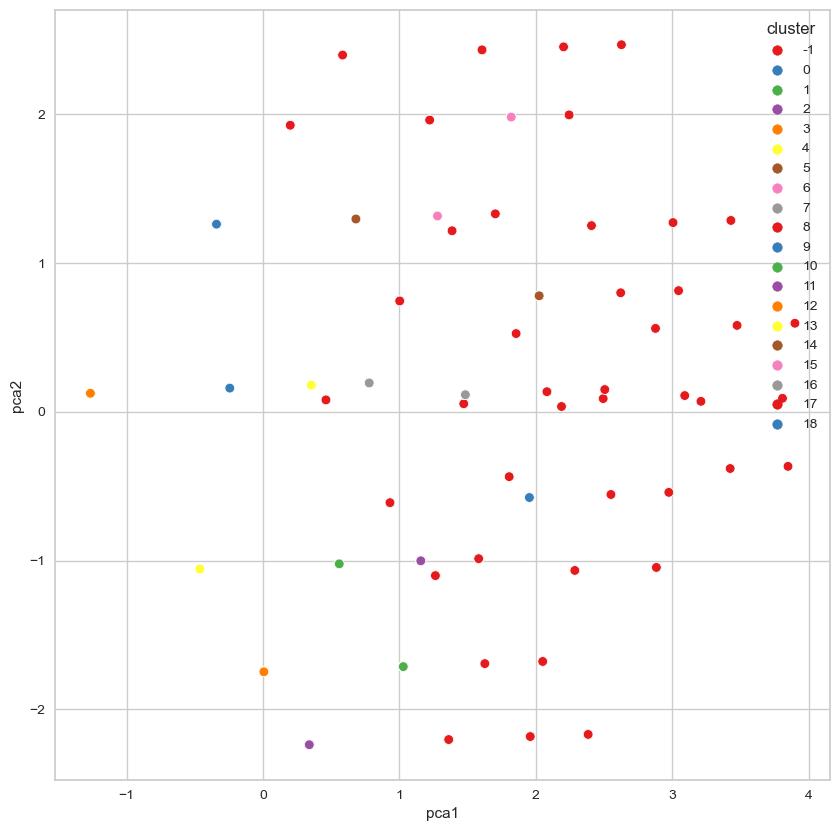

In [32]:
# Plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=db_scan_cluster_pca, palette='Set1')
plt.show()

### Hierarchical Clustering

In [33]:
# Hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='average')
agg.fit(df_fighter_scaled)
labels = agg.labels_

# Add cluster labels to df_fighter
agg_cluster = df_fighter_scaled.copy()

agg_cluster.head()

,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,2.190456,2.445682,-0.593517
1,2.190456,-0.723493,2.813011
2,0.664668,-0.723493,-0.593517
3,0.664668,0.861095,-0.593517
4,0.664668,-0.723493,2.106092


In [34]:
# PCA to 2 components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(agg_cluster)
agg_cluster_pca = pca.transform(agg_cluster)
agg_cluster_pca = pd.DataFrame(agg_cluster_pca, columns=['pca1', 'pca2'])

# Add cluster labels to df_fighter
agg_cluster_pca['cluster'] = labels

agg_cluster_pca.head()

,pca1,pca2,cluster
0,2.383915,-2.167653,2
1,2.628066,2.464551,7
2,-0.243339,0.158169,0
3,0.559205,-1.022069,2
4,1.222148,1.958471,7


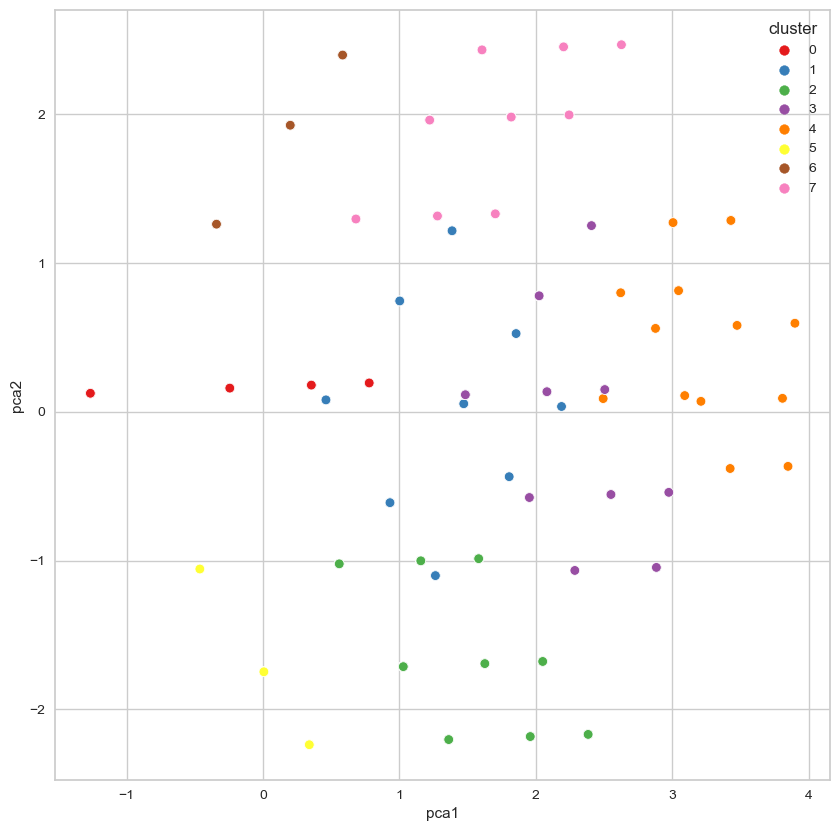

In [35]:
# Plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=agg_cluster_pca, palette='Set1')
plt.show()

Dari ketiga clustering yang sudah dilakukan menggunakan K-Means, DBSCAN, dan Hierarchical clustering, secara visual dari plot PCA yang paling distinguishable antar cluster-nya adalah K-Means.

### Interpretasi Cluster

In [52]:
cluster1_interpretation = df_fighter_scaled.copy()

# Revert back to original values
cluster1_interpretation = pd.DataFrame(scaler.inverse_transform(cluster1_interpretation), columns=cluster1_interpretation.columns)

# Revert log transformation
cluster1_interpretation['win_by_Decision_Unanimous'] = np.exp(cluster1_interpretation['win_by_Decision_Unanimous'])
cluster1_interpretation['win_by_KO/TKO'] = np.exp(cluster1_interpretation['win_by_KO/TKO'])
cluster1_interpretation['win_by_Submission'] = np.exp(cluster1_interpretation['win_by_Submission'])

# Minus 1 to revert back to original values
cluster1_interpretation['win_by_Decision_Unanimous'] = cluster1_interpretation['win_by_Decision_Unanimous'] - 1
cluster1_interpretation['win_by_KO/TKO'] = cluster1_interpretation['win_by_KO/TKO'] - 1
cluster1_interpretation['win_by_Submission'] = cluster1_interpretation['win_by_Submission'] - 1

cluster1_interpretation['cluster'] = kmeans.labels_

cluster1_interpretation.head()

,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
0,3.0,3.0,0.0,6
1,3.0,0.0,3.0,3
2,1.0,0.0,0.0,2
3,1.0,1.0,0.0,6
4,1.0,0.0,2.0,3


In [53]:
# Cluster 0
cluster1_interpretation[cluster1_interpretation['cluster'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,77.0,1.584416,0.783895,1.0,1.0,1.0,2.0,3.0
win_by_KO/TKO,77.0,1.428571,0.657519,1.0,1.0,1.0,2.0,3.0
win_by_Submission,77.0,1.558442,0.734372,1.0,1.0,1.0,2.0,3.0
cluster,77.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
# Cluster 1
cluster1_interpretation[cluster1_interpretation['cluster'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_KO/TKO,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_Submission,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cluster,281.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [55]:
# Cluster 2
cluster1_interpretation[cluster1_interpretation['cluster'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,217.0,1.267281,0.546443,1.0,1.0,1.0,1.0,3.0
win_by_KO/TKO,217.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_Submission,217.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cluster,217.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [56]:
# Cluster 3
cluster1_interpretation[cluster1_interpretation['cluster'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,84.0,1.464286,0.648379,1.0,1.0,1.0,2.0,3.0
win_by_KO/TKO,84.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_Submission,84.0,1.511905,0.719673,1.0,1.0,1.0,2.0,3.0
cluster,84.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [57]:
# Cluster 4
cluster1_interpretation[cluster1_interpretation['cluster'] == 4].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,163.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_KO/TKO,163.0,1.349693,0.613971,1.0,1.0,1.0,2.0,3.0
win_by_Submission,163.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cluster,163.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [58]:
# Cluster 5
cluster1_interpretation[cluster1_interpretation['cluster'] == 5].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,109.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_KO/TKO,109.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_Submission,109.0,1.238532,0.507337,1.0,1.0,1.0,1.0,3.0
cluster,109.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


In [59]:
# Cluster 6
cluster1_interpretation[cluster1_interpretation['cluster'] == 6].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,127.0,1.535433,0.710413,1.0,1.0,1.0,2.0,3.0
win_by_KO/TKO,127.0,1.488189,0.676899,1.0,1.0,1.0,2.0,3.0
win_by_Submission,127.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cluster,127.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0


In [60]:
# Cluster 7
cluster1_interpretation[cluster1_interpretation['cluster'] == 7].describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,40.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_KO/TKO,40.0,1.50,0.716115,1.0,1.0,1.0,2.0,3.0
win_by_Submission,40.0,1.55,0.814925,1.0,1.0,1.0,2.0,3.0
cluster,40.0,7.00,0.000000,7.0,7.0,7.0,7.0,7.0


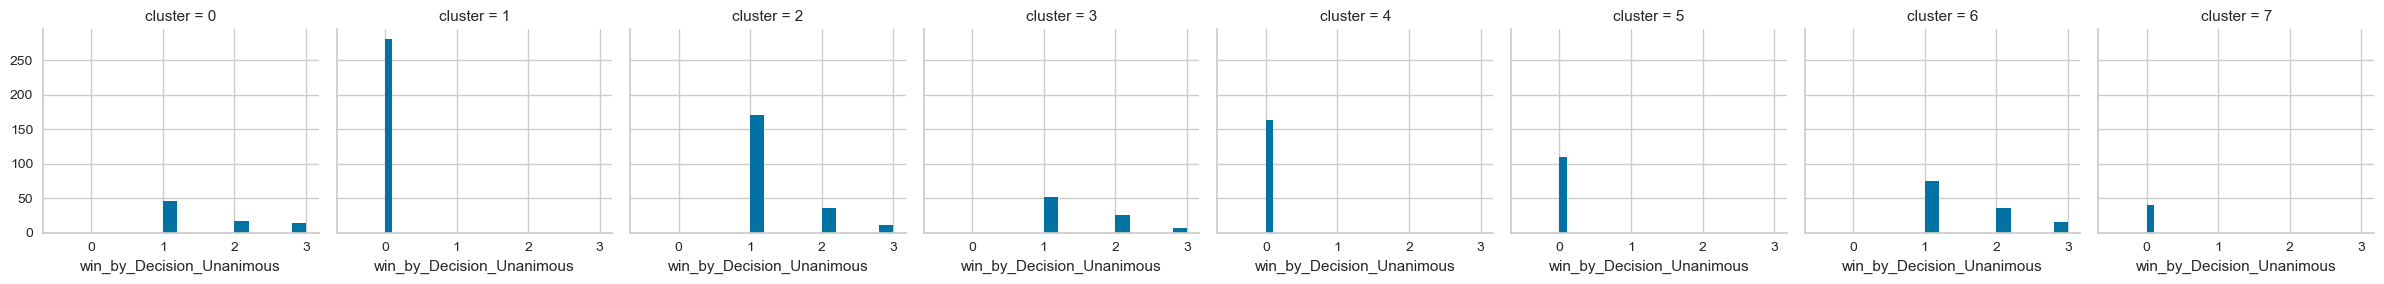

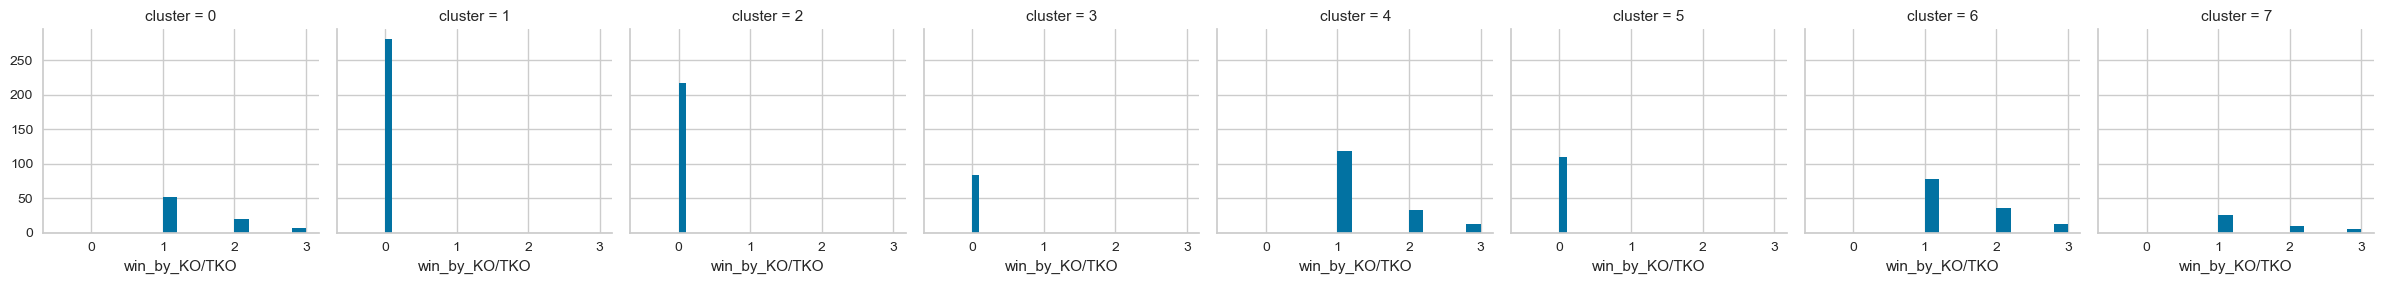

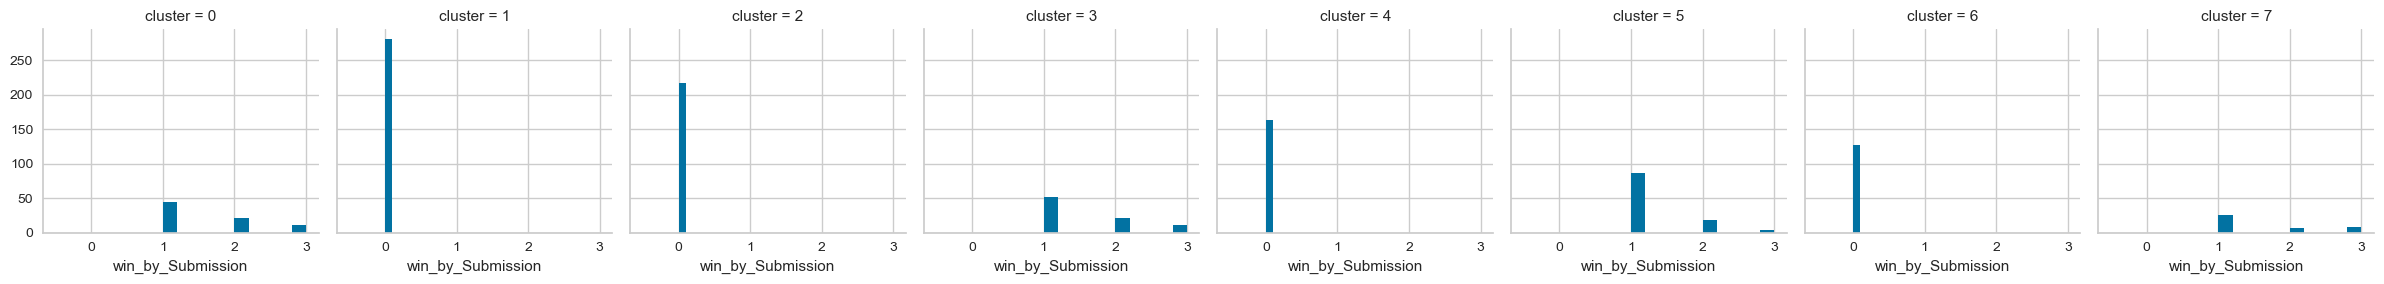

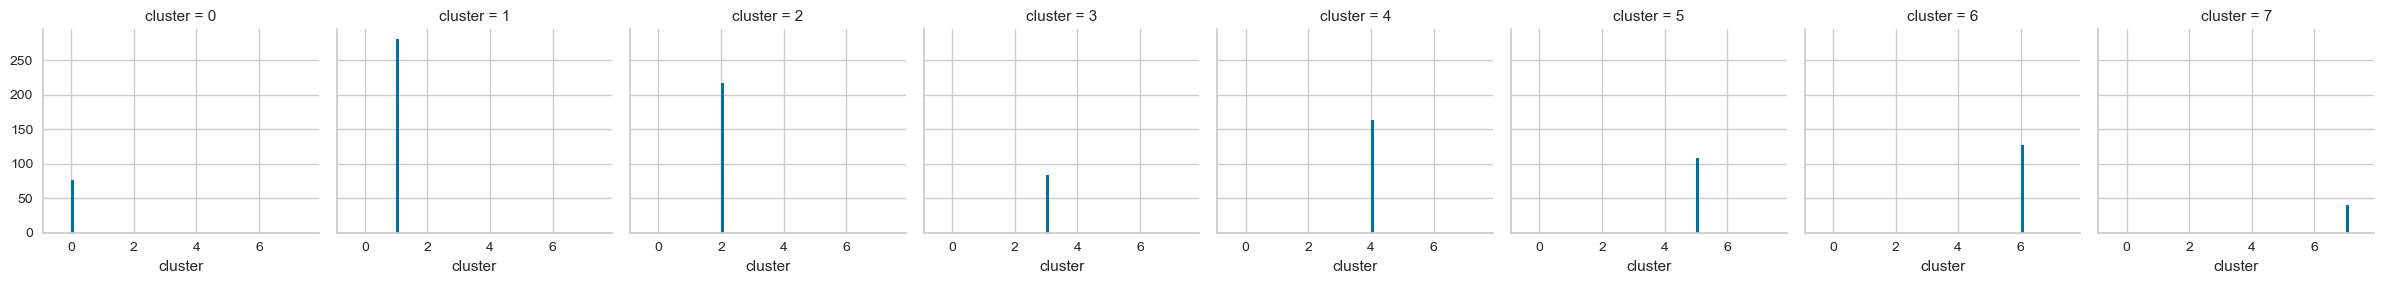

In [61]:
for c in cluster1_interpretation[:-1].columns:
    grid= sns.FacetGrid(cluster1_interpretation, col='cluster')
    grid.map(plt.hist, c)
    plt.show()

### Clustering 2

In [158]:
features_to_keep = ["B_fighter", "R_fighter", "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]

df_cluster2 = df[features_to_keep]

df_cluster2.head()

,B_fighter,R_fighter,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,R_avg_HEAD_landed,R_avg_BODY_landed,R_avg_LEG_landed,R_avg_DISTANCE_landed
0,Al Iaquinta,Jorge Masvidal,3.713000,2.170838,1.870600,3.867287,3.657937,2.916080,1.842532,3.750974
1,Johny Hendricks,Josh Koscheck,2.549811,1.713235,1.298573,2.290006,3.029900,2.114959,0.144418,2.766444
2,Manvel Gamburyan,John Dodson,2.978172,1.864489,1.928921,3.068110,2.822123,3.000798,2.392197,3.537557
3,Katsunori Kikuno,Tony Ferguson,2.833213,1.791759,1.098612,2.890372,2.744864,1.490091,2.031432,3.164947
4,Viscardi Andrade,Richard Walsh,3.277145,2.772589,2.140066,3.496508,3.710519,2.474435,2.740840,3.544576


In [159]:
df_cluster2 = df_cluster2.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df_cluster2[['B_fighter', "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed"]]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df_cluster2[['R_fighter', "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,Al Iaquinta,3.713000,2.170838,1.870600,3.867287
1,Johny Hendricks,2.549811,1.713235,1.298573,2.290006
2,Manvel Gamburyan,2.978172,1.864489,1.928921,3.068110
3,Katsunori Kikuno,2.833213,1.791759,1.098612,2.890372
4,Viscardi Andrade,3.277145,2.772589,2.140066,3.496508


In [160]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_HEAD_landed,6042.0,3.028816,0.686783,0.0,2.639057,3.091042,3.491999,5.159996
avg_BODY_landed,6042.0,1.901501,0.733193,0.0,1.430061,1.948140,2.416257,4.174387
avg_LEG_landed,6042.0,1.632680,0.812175,0.0,1.098612,1.681759,2.221994,4.148700
avg_DISTANCE_landed,6042.0,3.028777,0.816072,0.0,2.545531,3.113515,3.626006,5.266045


In [161]:
df_fighter.shape

(6042, 5)

In [162]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [163]:
df_fighter.shape

(1251, 5)

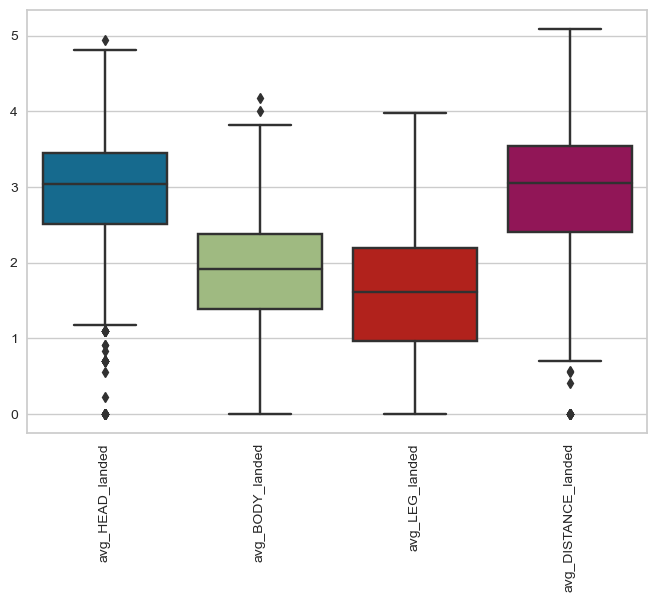

In [164]:
# Check outliers
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()


In [165]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [166]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
avg_BODY_landed         2
avg_DISTANCE_landed    19
avg_HEAD_landed        50
avg_LEG_landed          0
fighter                 0
dtype: int64


percentage of outliers in each column:
avg_BODY_landed = 0.16%
avg_DISTANCE_landed = 1.52%
avg_HEAD_landed = 4.0%
avg_LEG_landed = 0.0%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_5604/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [167]:
# Drop outliers in x y z columns
def drop_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

In [168]:
columns_to_drop_outliers = ['avg_HEAD_landed', 'avg_BODY_landed', 'avg_LEG_landed', 'avg_DISTANCE_landed']

for c in columns_to_drop_outliers:
    df_fighter = drop_outliers(df_fighter, c)

df_fighter.shape

(1190, 5)

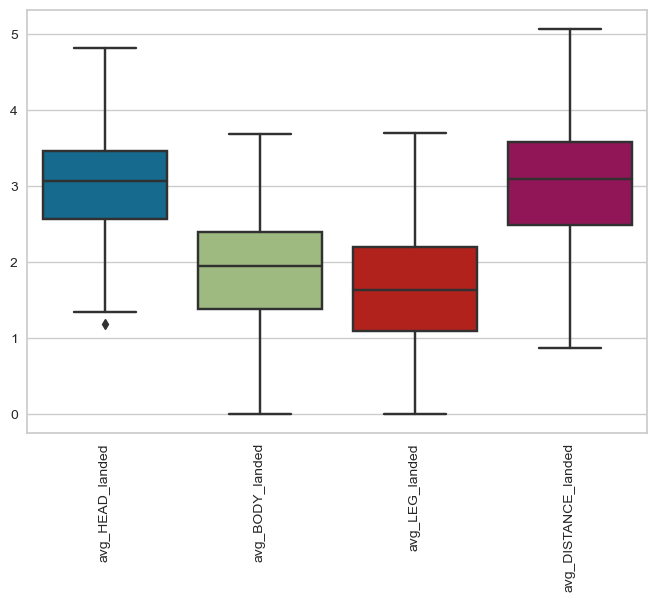

In [169]:
# Boxplot
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()

In [170]:
# Filter avg_HEAD_landed to > 1.2
df_fighter = df_fighter[df_fighter['avg_HEAD_landed'] > 1.2]

In [171]:
df_fighter.head()

,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,Al Iaquinta,3.713000,2.170838,1.870600,3.867287
1,Johny Hendricks,2.549811,1.713235,1.298573,2.290006
2,Manvel Gamburyan,2.978172,1.864489,1.928921,3.068110
3,Katsunori Kikuno,2.833213,1.791759,1.098612,2.890372
4,Viscardi Andrade,3.277145,2.772589,2.140066,3.496508


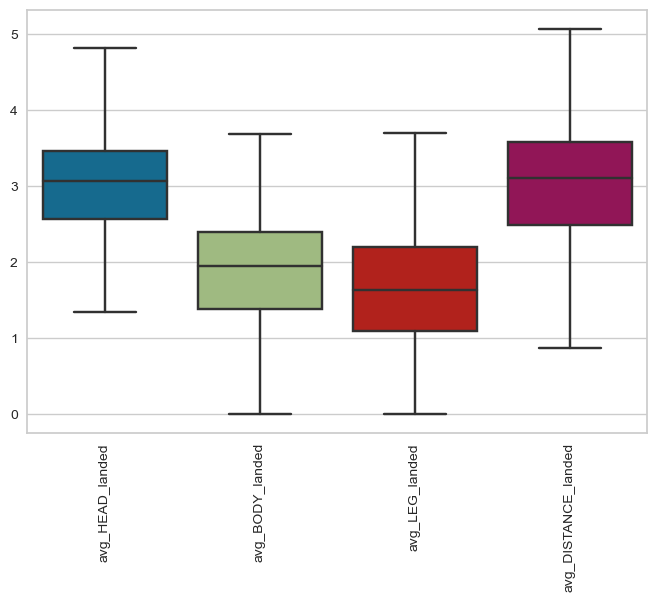

In [172]:
# Boxplot
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()

In [173]:
df_fighter.shape

(1189, 5)

In [175]:
df_fighter.head()

,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,Al Iaquinta,3.713000,2.170838,1.870600,3.867287
1,Johny Hendricks,2.549811,1.713235,1.298573,2.290006
2,Manvel Gamburyan,2.978172,1.864489,1.928921,3.068110
3,Katsunori Kikuno,2.833213,1.791759,1.098612,2.890372
4,Viscardi Andrade,3.277145,2.772589,2.140066,3.496508


In [176]:
# Drop duplicates
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [179]:
# Reindex
df_fighter.reset_index(drop=True, inplace=True)

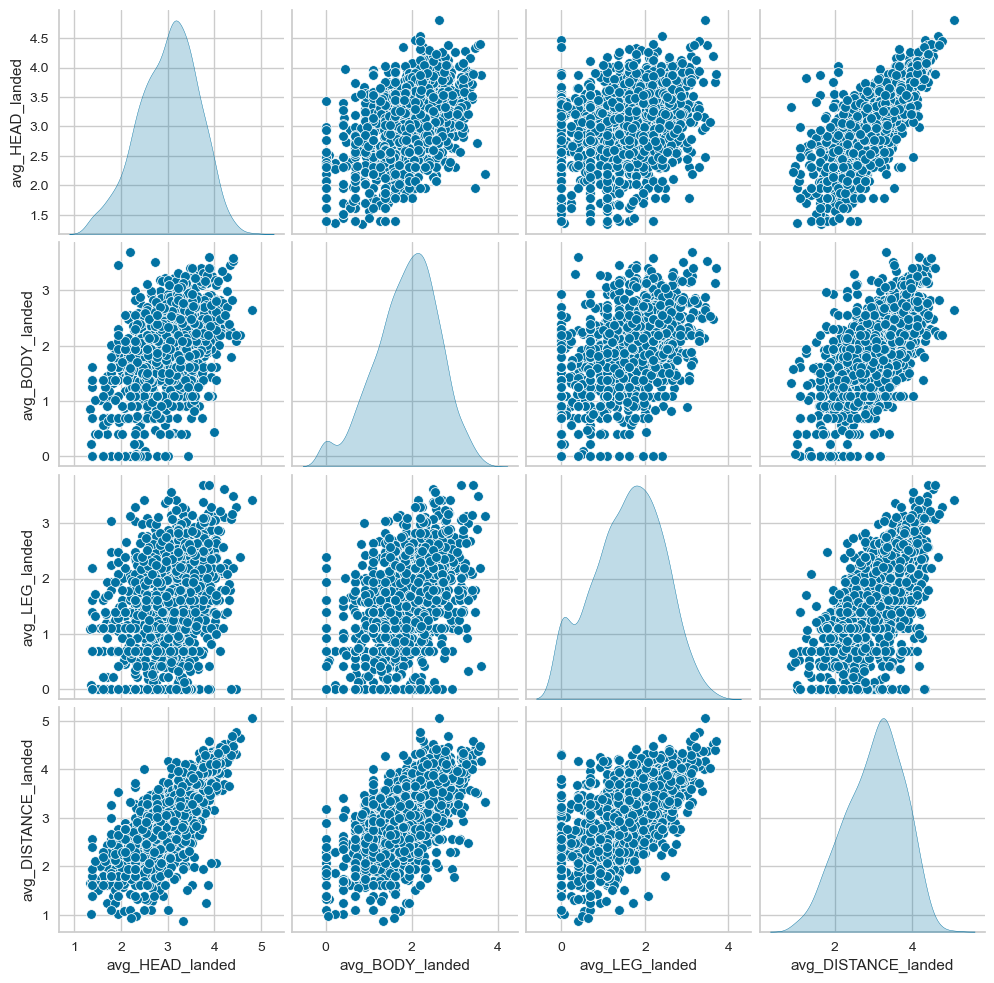

In [180]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [181]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [187]:
# PCA to two components
pca = PCA(n_components=2)
df_fighter_pca = pca.fit_transform(df_fighter_scaled)

# Create a new dataframe with the PCA scores
df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['PC1', 'PC2'])

df_fighter_pca.head()

,PC1,PC2
0,-1.534032,0.539254
1,1.184112,-0.268404
2,-0.178881,-0.335010
3,0.560332,0.277717
4,-1.460183,-0.231180


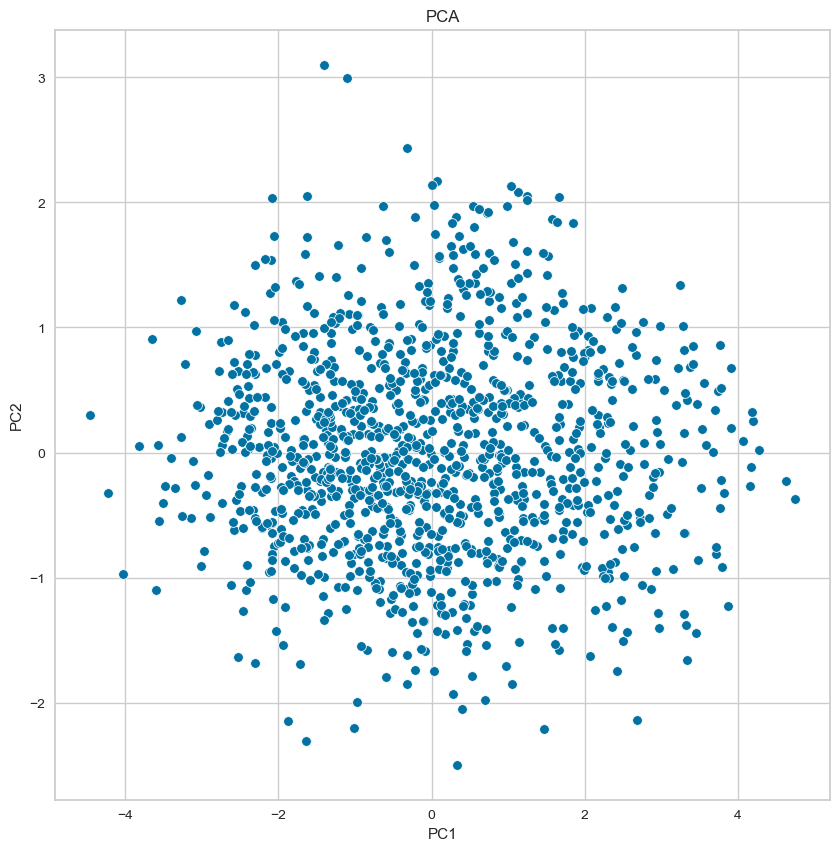

In [188]:
# Plot PCA
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2')
plt.title("PCA")
plt.show()

In [182]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


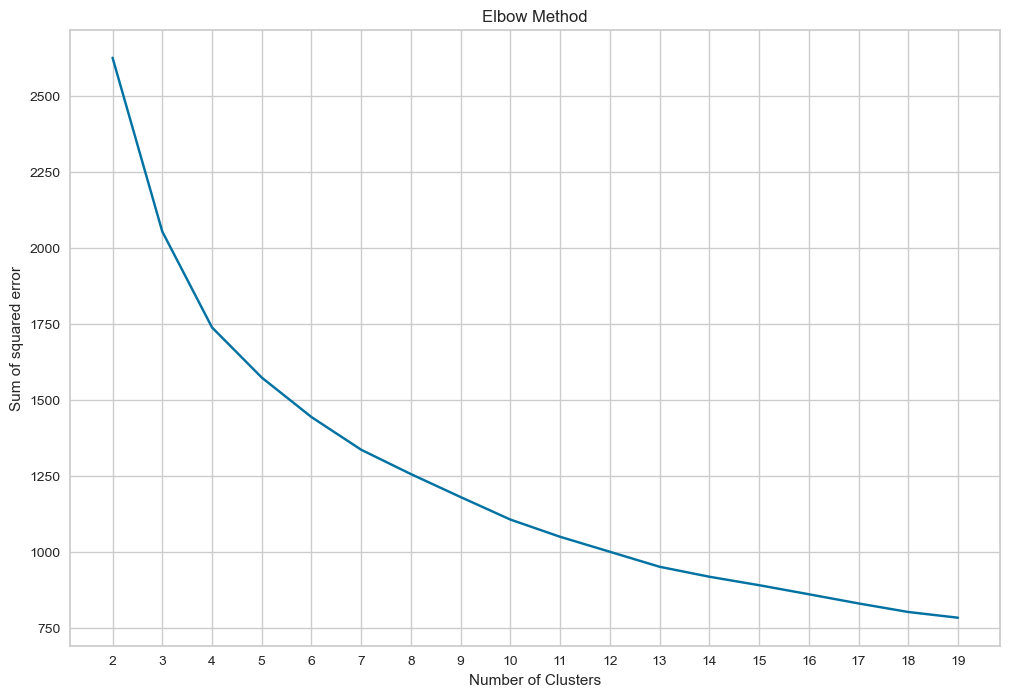

In [183]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 20), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.xticks(range(2, 20))
plt.show()

"Elbow" kurang keliatan

For n_clusters = 2 The average silhouette_coefficient is : 0.36987950519208024
For n_clusters = 3 The average silhouette_coefficient is : 0.2781750900395552
For n_clusters = 4 The average silhouette_coefficient is : 0.27667842728067293
For n_clusters = 5 The average silhouette_coefficient is : 0.23083369690487726
For n_clusters = 6 The average silhouette_coefficient is : 0.22256380383916438
For n_clusters = 7 The average silhouette_coefficient is : 0.217055740096575
For n_clusters = 8 The average silhouette_coefficient is : 0.21073090356365362
For n_clusters = 9 The average silhouette_coefficient is : 0.20979380076905754
For n_clusters = 10 The average silhouette_coefficient is : 0.2090075996597436
For n_clusters = 11 The average silhouette_coefficient is : 0.2079733923511713
For n_clusters = 12 The average silhouette_coefficient is : 0.20957692694811858
For n_clusters = 13 The average silhouette_coefficient is : 0.21199930466256897
For n_clusters = 14 The average silhouette_coefficien

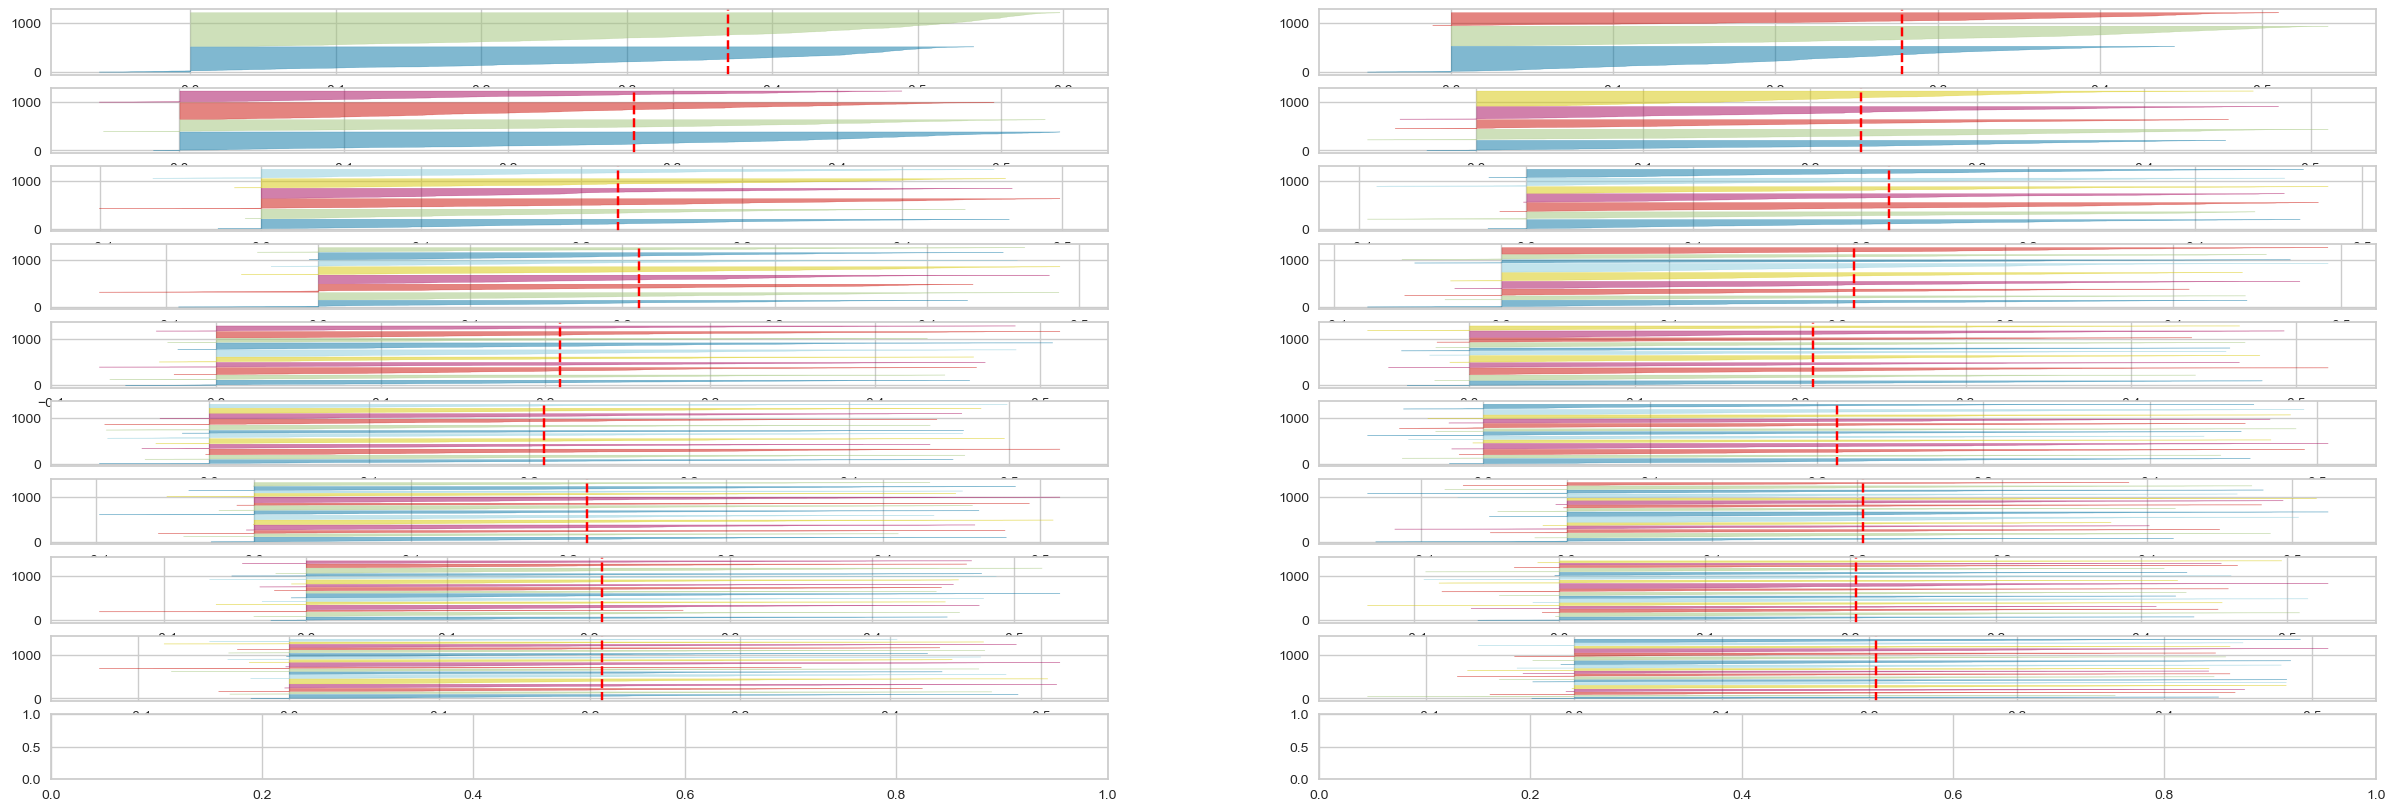

In [184]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [i for i in range(2, 20)]

silhouette_avg_list = []

fig, ax = plt.subplots(10, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

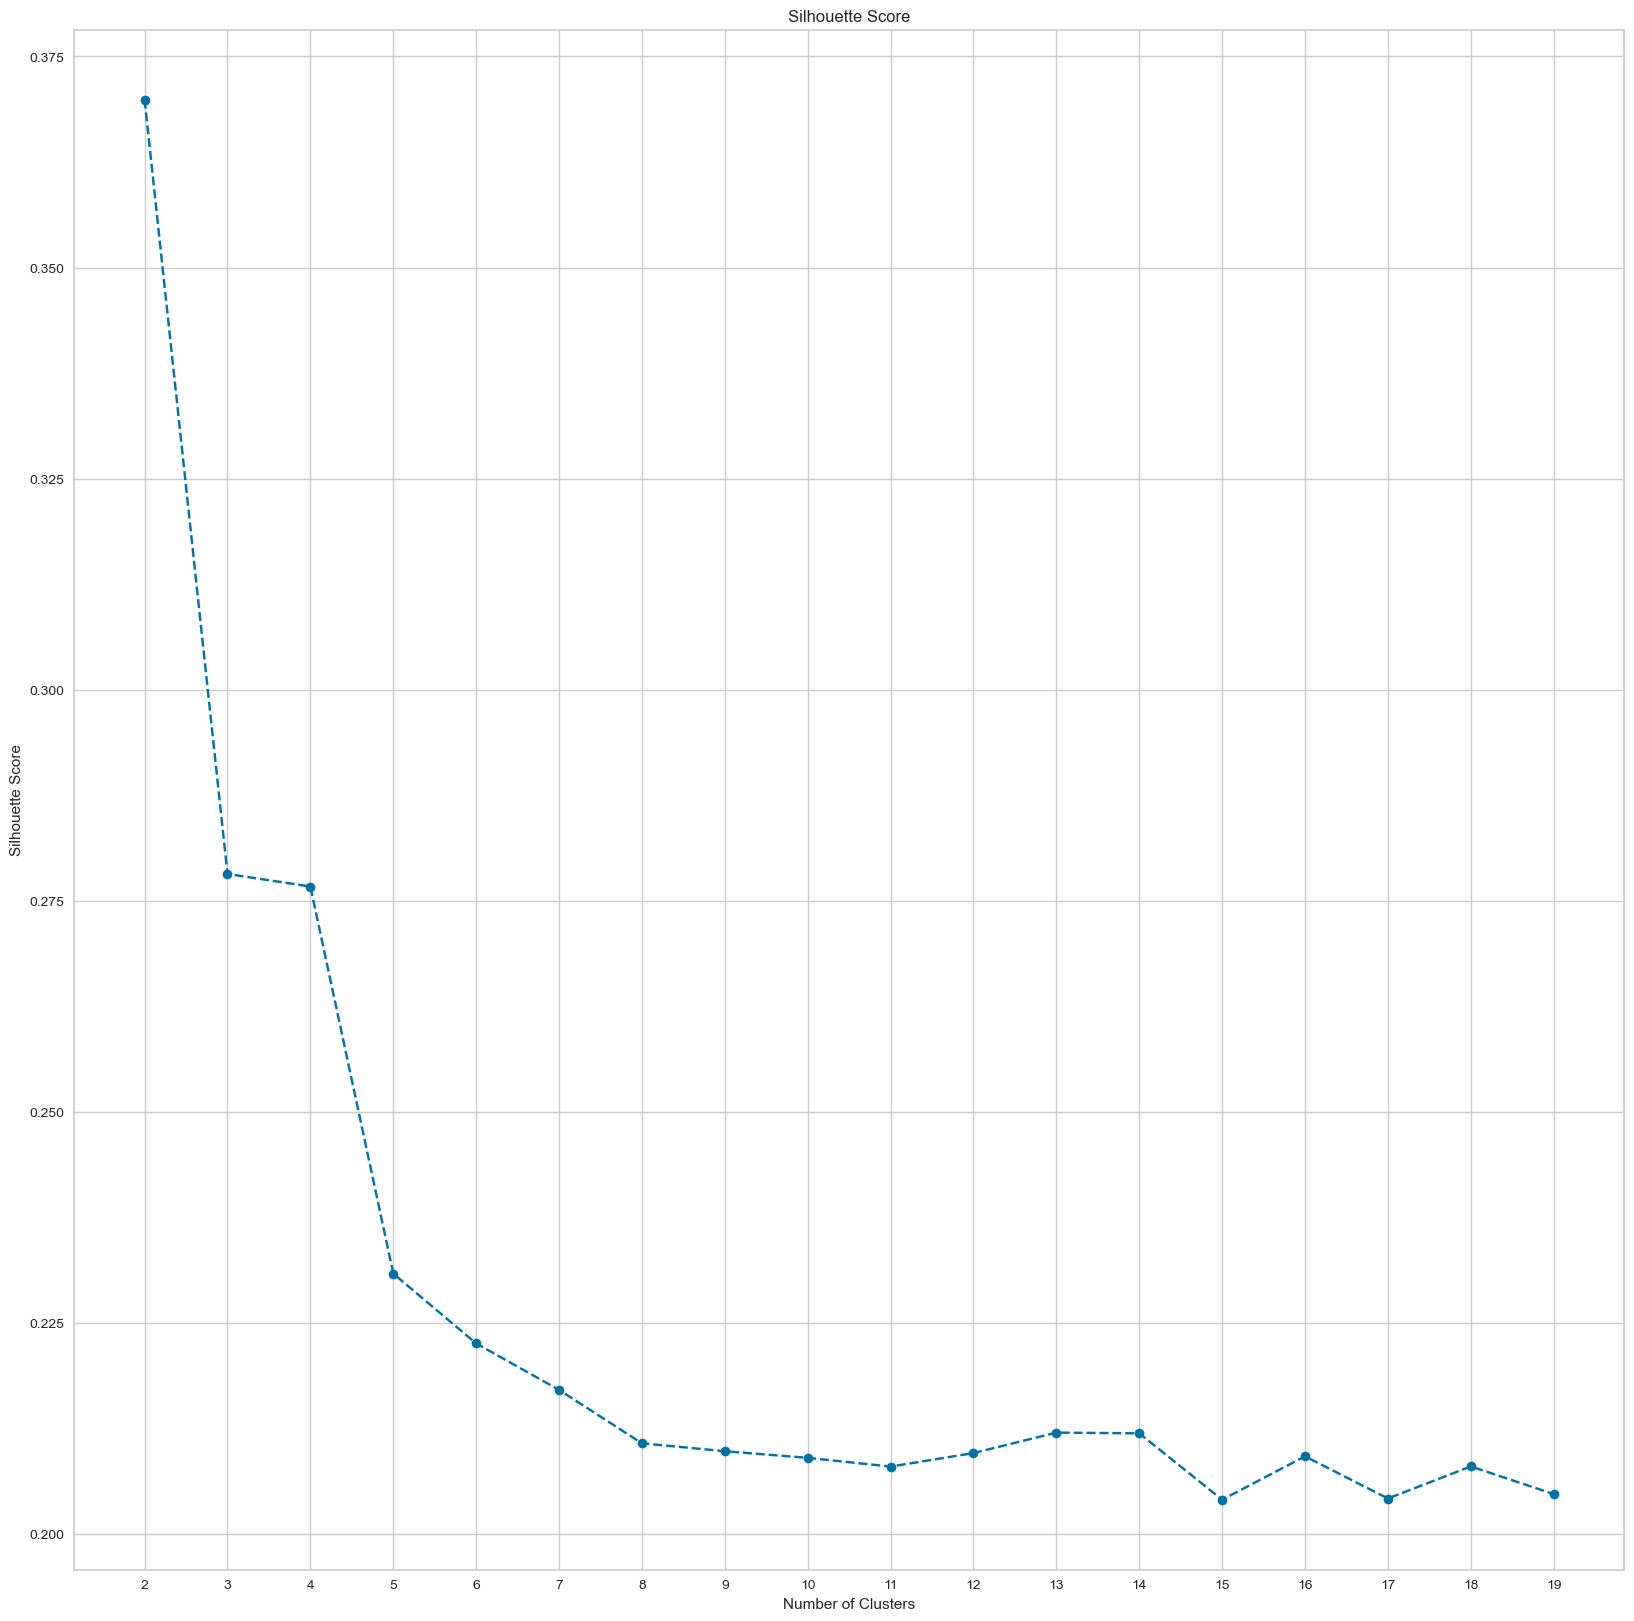

In [198]:
plt.figure(figsize=(20, 20))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.title('Silhouette Score')

plt.show()

In [190]:
df_fighter_scaled.head()

,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,1.118919,0.395377,0.331552,1.133190
1,-0.732388,-0.231640,-0.358465,-0.971228
2,-0.050619,-0.024389,0.401903,0.066922
3,-0.281332,-0.124044,-0.599670,-0.170217
4,0.425220,1.219910,0.656600,0.638493


In [191]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

db.fit(df_fighter_scaled)

DBSCAN(eps=3, min_samples=4)

In [194]:
label=db.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [196]:
df_fighter_pca['cluster'] = label

df_fighter_pca.head()

,PC1,PC2,cluster
0,-1.534032,0.539254,0
1,1.184112,-0.268404,0
2,-0.178881,-0.335010,0
3,0.560332,0.277717,0
4,-1.460183,-0.231180,0


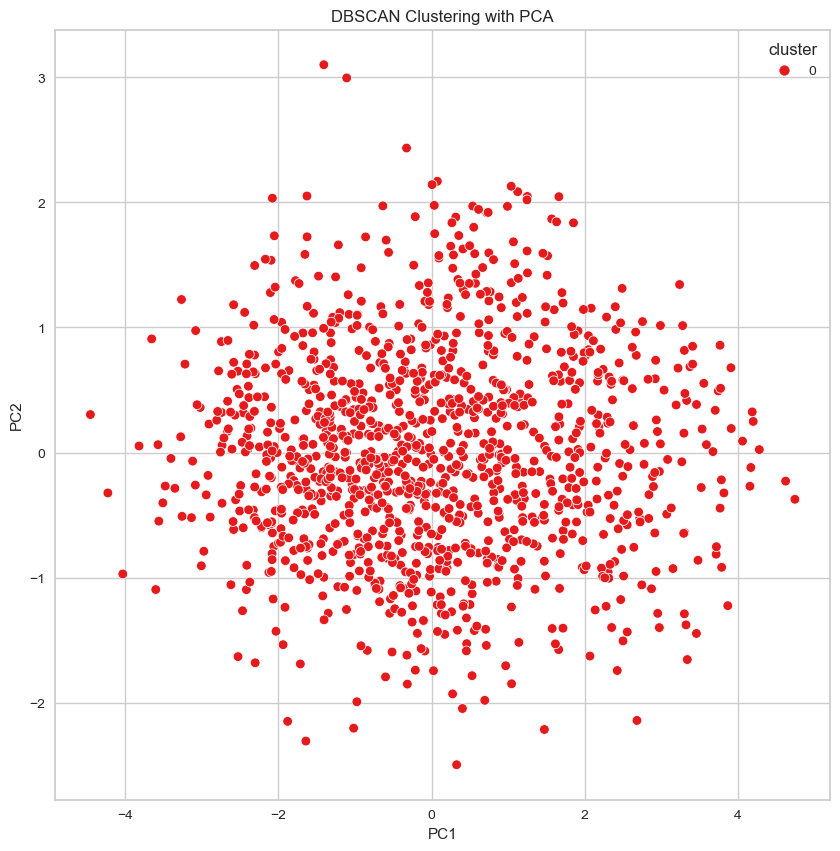

In [197]:
# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("DBSCAN Clustering with PCA")
plt.show()

Bro what...

### Cluster 3
Fisik fighter

In [199]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [200]:
features_to_keep = ["B_age", "B_Reach_cms", "B_Weight_lbs", "B_Height_cms", "R_age", "R_Reach_cms", "R_Weight_lbs", "R_Height_cms"]

df_cluster3 = df[features_to_keep]

df_cluster3.head()

,B_age,B_Reach_cms,B_Weight_lbs,B_Height_cms,R_age,R_Reach_cms,R_Weight_lbs,R_Height_cms
0,3.871201,5.802722,5.602119,5.802722,3.912023,5.832938,5.655992,5.817944
1,3.891820,5.795024,5.707110,5.795024,3.988984,5.825469,5.655992,5.810362
2,4.007333,5.779446,5.525453,5.763622,3.931826,5.771566,5.525453,5.755616
3,3.970292,5.771566,5.564520,5.787265,3.912023,5.847710,5.602119,5.817944
4,3.970292,5.840351,5.655992,5.810362,3.850148,5.825469,5.655992,5.825469


In [201]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', "B_age", "B_Reach_cms", "B_Weight_lbs", "B_Height_cms"]]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', "R_age", "R_Reach_cms", "R_Weight_lbs", "R_Height_cms"]]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,age,Reach_cms,Weight_lbs,Height_cms
0,Al Iaquinta,3.871201,5.802722,5.602119,5.802722
1,Johny Hendricks,3.891820,5.795024,5.707110,5.795024
2,Manvel Gamburyan,4.007333,5.779446,5.525453,5.763622
3,Katsunori Kikuno,3.970292,5.771566,5.564520,5.787265
4,Viscardi Andrade,3.970292,5.840351,5.655992,5.810362


In [202]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
age,6042.0,3.923599,0.078824,3.663562,3.871201,3.931826,3.970292,4.219508
Reach_cms,6042.0,5.818103,0.031873,5.722931,5.802722,5.817944,5.840351,5.904708
Weight_lbs,6042.0,5.637870,0.118179,5.442418,5.564520,5.602119,5.707110,5.942799
Height_cms,6042.0,5.807980,0.027026,5.722931,5.787265,5.810362,5.825469,5.904708


In [203]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

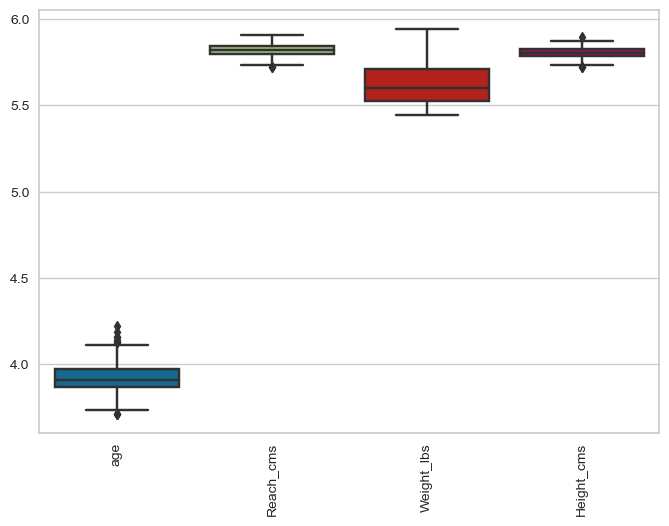

In [204]:
# Check outliers
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()


In [205]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
Height_cms     3
Reach_cms      2
Weight_lbs     0
age           11
fighter        0
dtype: int64


percentage of outliers in each column:
Height_cms = 0.24%
Reach_cms = 0.16%
Weight_lbs = 0.0%
age = 0.88%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_5604/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [206]:
columns_to_drop_outliers = ['age', 'Reach_cms', 'Weight_lbs', 'Height_cms']

for c in columns_to_drop_outliers:
    df_fighter = drop_outliers(df_fighter, c)

df_fighter.shape

(1236, 5)

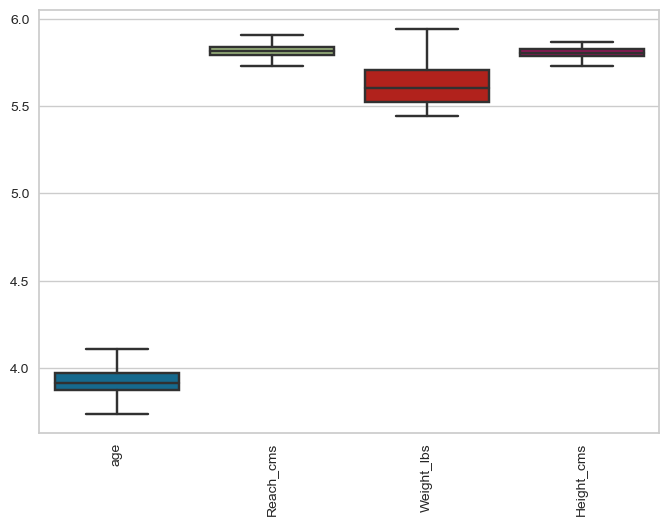

In [207]:
# Boxplot
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()

In [208]:
# Drop duplicates
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [209]:
# Reindex
df_fighter.reset_index(drop=True, inplace=True)

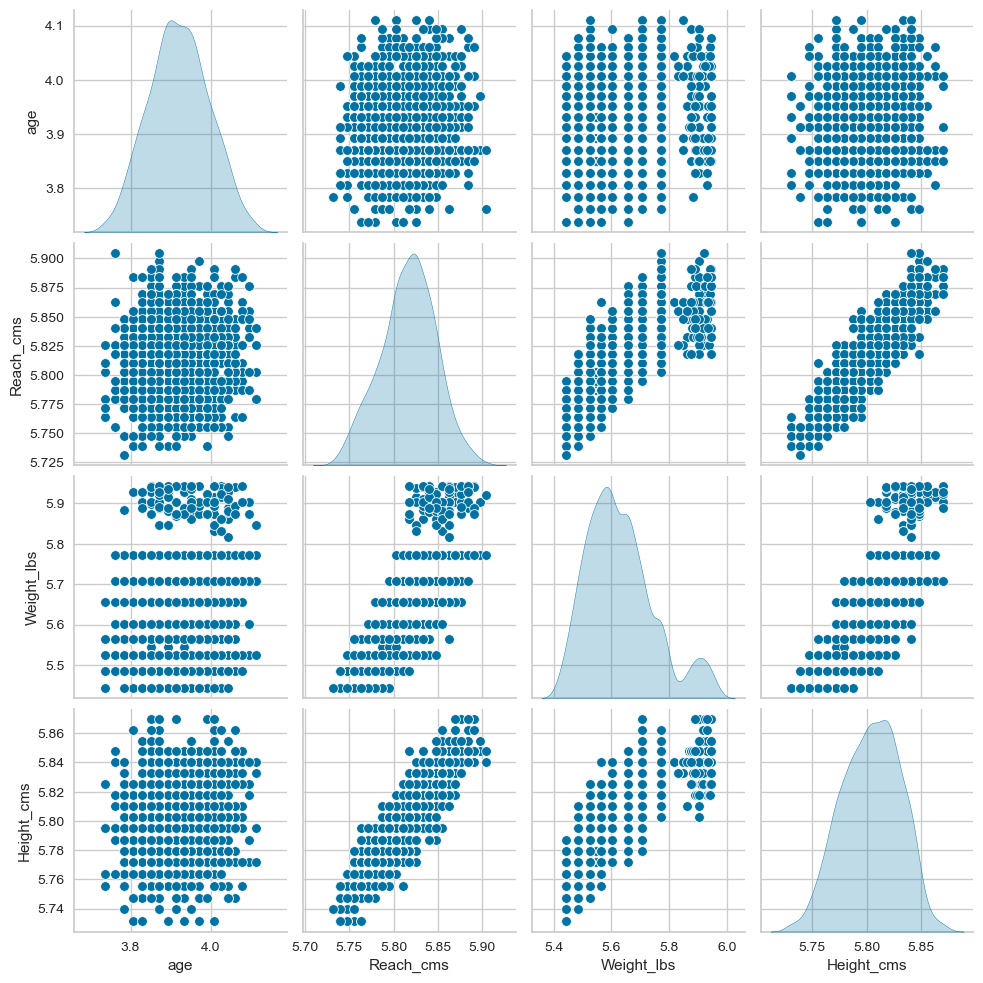

In [210]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [211]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [212]:
# PCA to two components
pca = PCA(n_components=2)
df_fighter_pca = pca.fit_transform(df_fighter_scaled)

# Create a new dataframe with the PCA scores
df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['PC1', 'PC2'])

df_fighter_pca.head()

,PC1,PC2
0,-0.490443,-0.601508
1,-0.260296,-0.236801
2,-1.922553,1.453258
3,-1.423709,0.894680
4,0.795557,0.554551


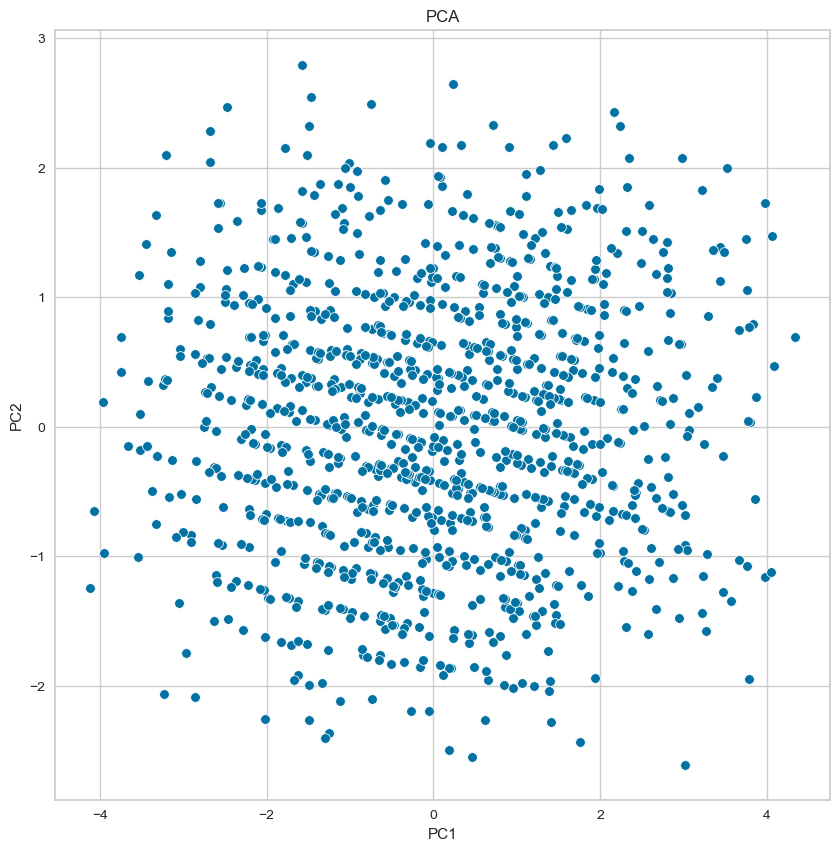

In [213]:
# Plot PCA
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2')
plt.title("PCA")
plt.show()

In [214]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


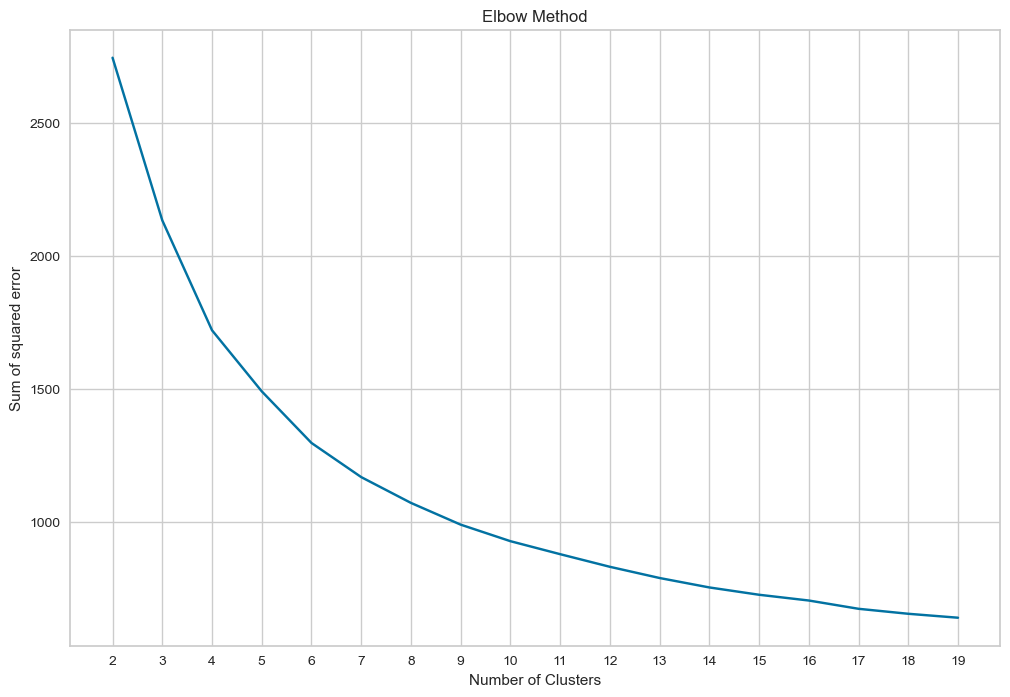

In [215]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 20), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.xticks(range(2, 20))
plt.show()

For n_clusters = 2 The average silhouette_coefficient is : 0.3644607155077832
For n_clusters = 3 The average silhouette_coefficient is : 0.2829939787779653
For n_clusters = 4 The average silhouette_coefficient is : 0.2884571568260623
For n_clusters = 5 The average silhouette_coefficient is : 0.26848656802713583
For n_clusters = 6 The average silhouette_coefficient is : 0.2655468149143559
For n_clusters = 7 The average silhouette_coefficient is : 0.25679851478853805
For n_clusters = 8 The average silhouette_coefficient is : 0.25286664836229633
For n_clusters = 9 The average silhouette_coefficient is : 0.24870758038553897
For n_clusters = 10 The average silhouette_coefficient is : 0.24144802643261754
For n_clusters = 11 The average silhouette_coefficient is : 0.23752146667740884
For n_clusters = 12 The average silhouette_coefficient is : 0.2352767107796761
For n_clusters = 13 The average silhouette_coefficient is : 0.23563348754728877
For n_clusters = 14 The average silhouette_coefficien

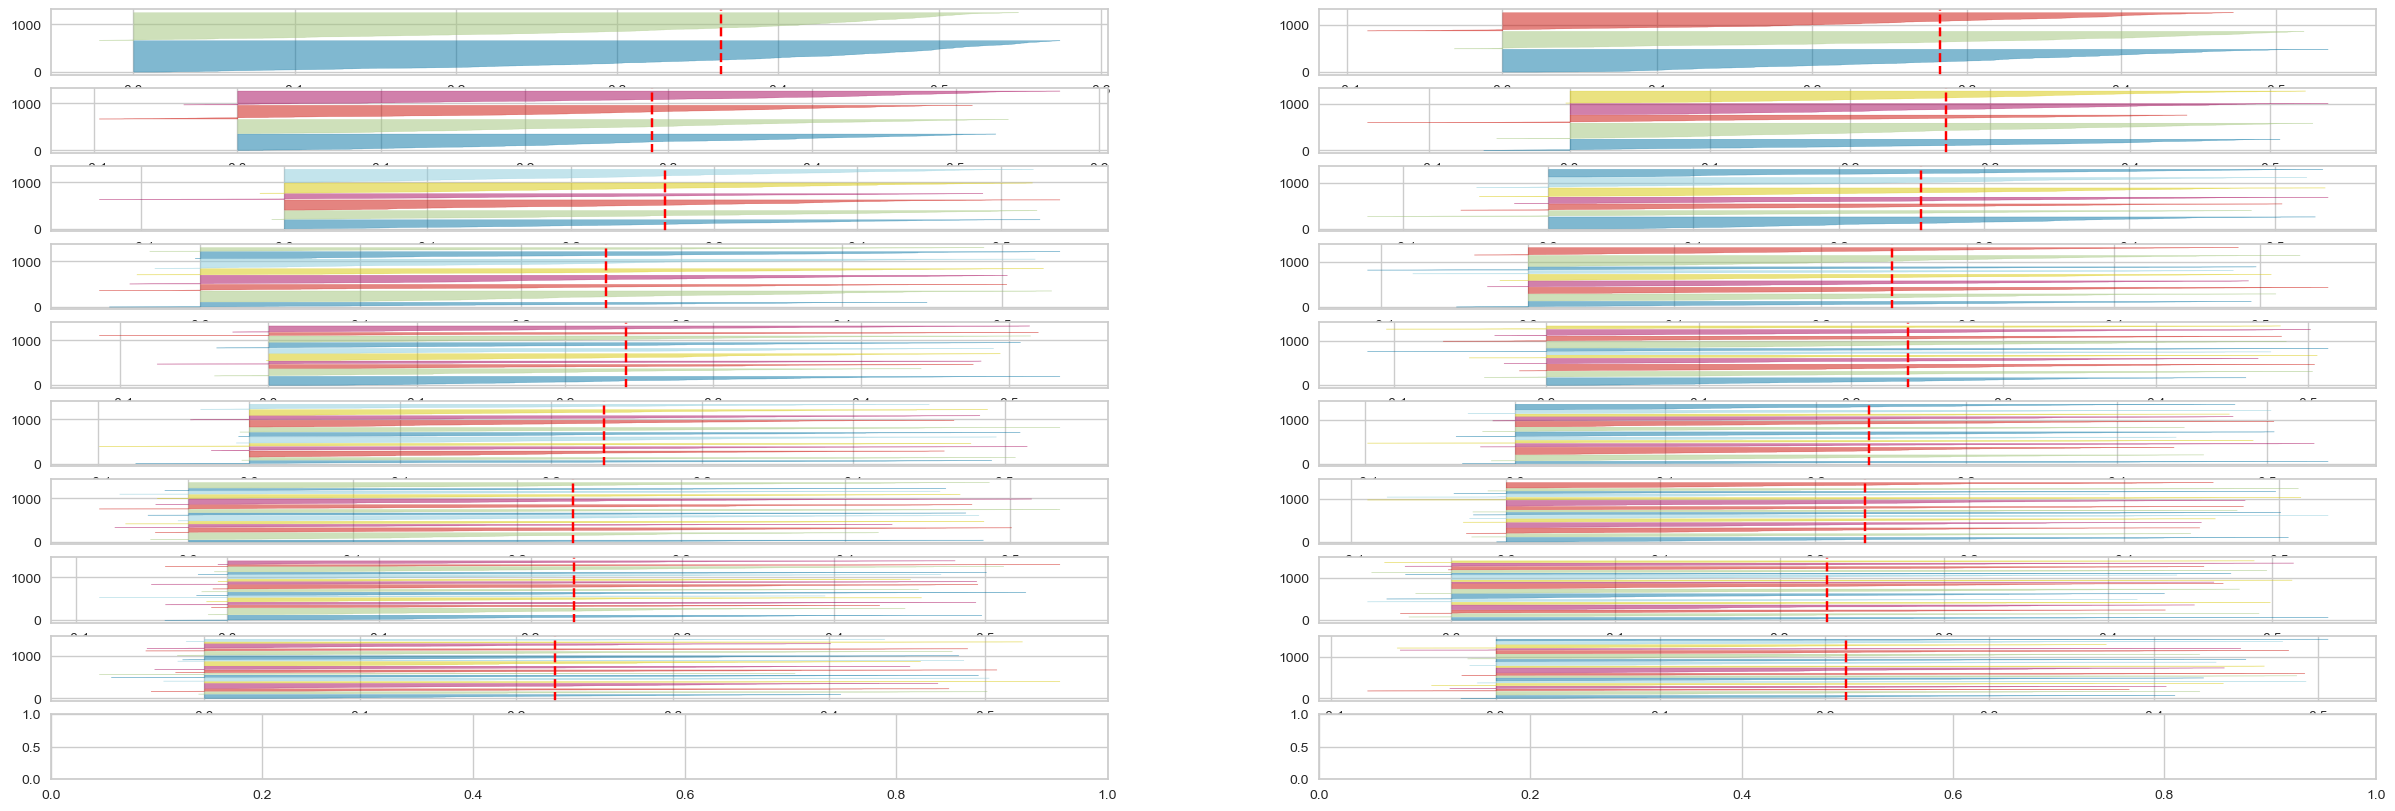

In [216]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [i for i in range(2, 20)]

silhouette_avg_list = []

fig, ax = plt.subplots(10, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_fighter_scaled)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

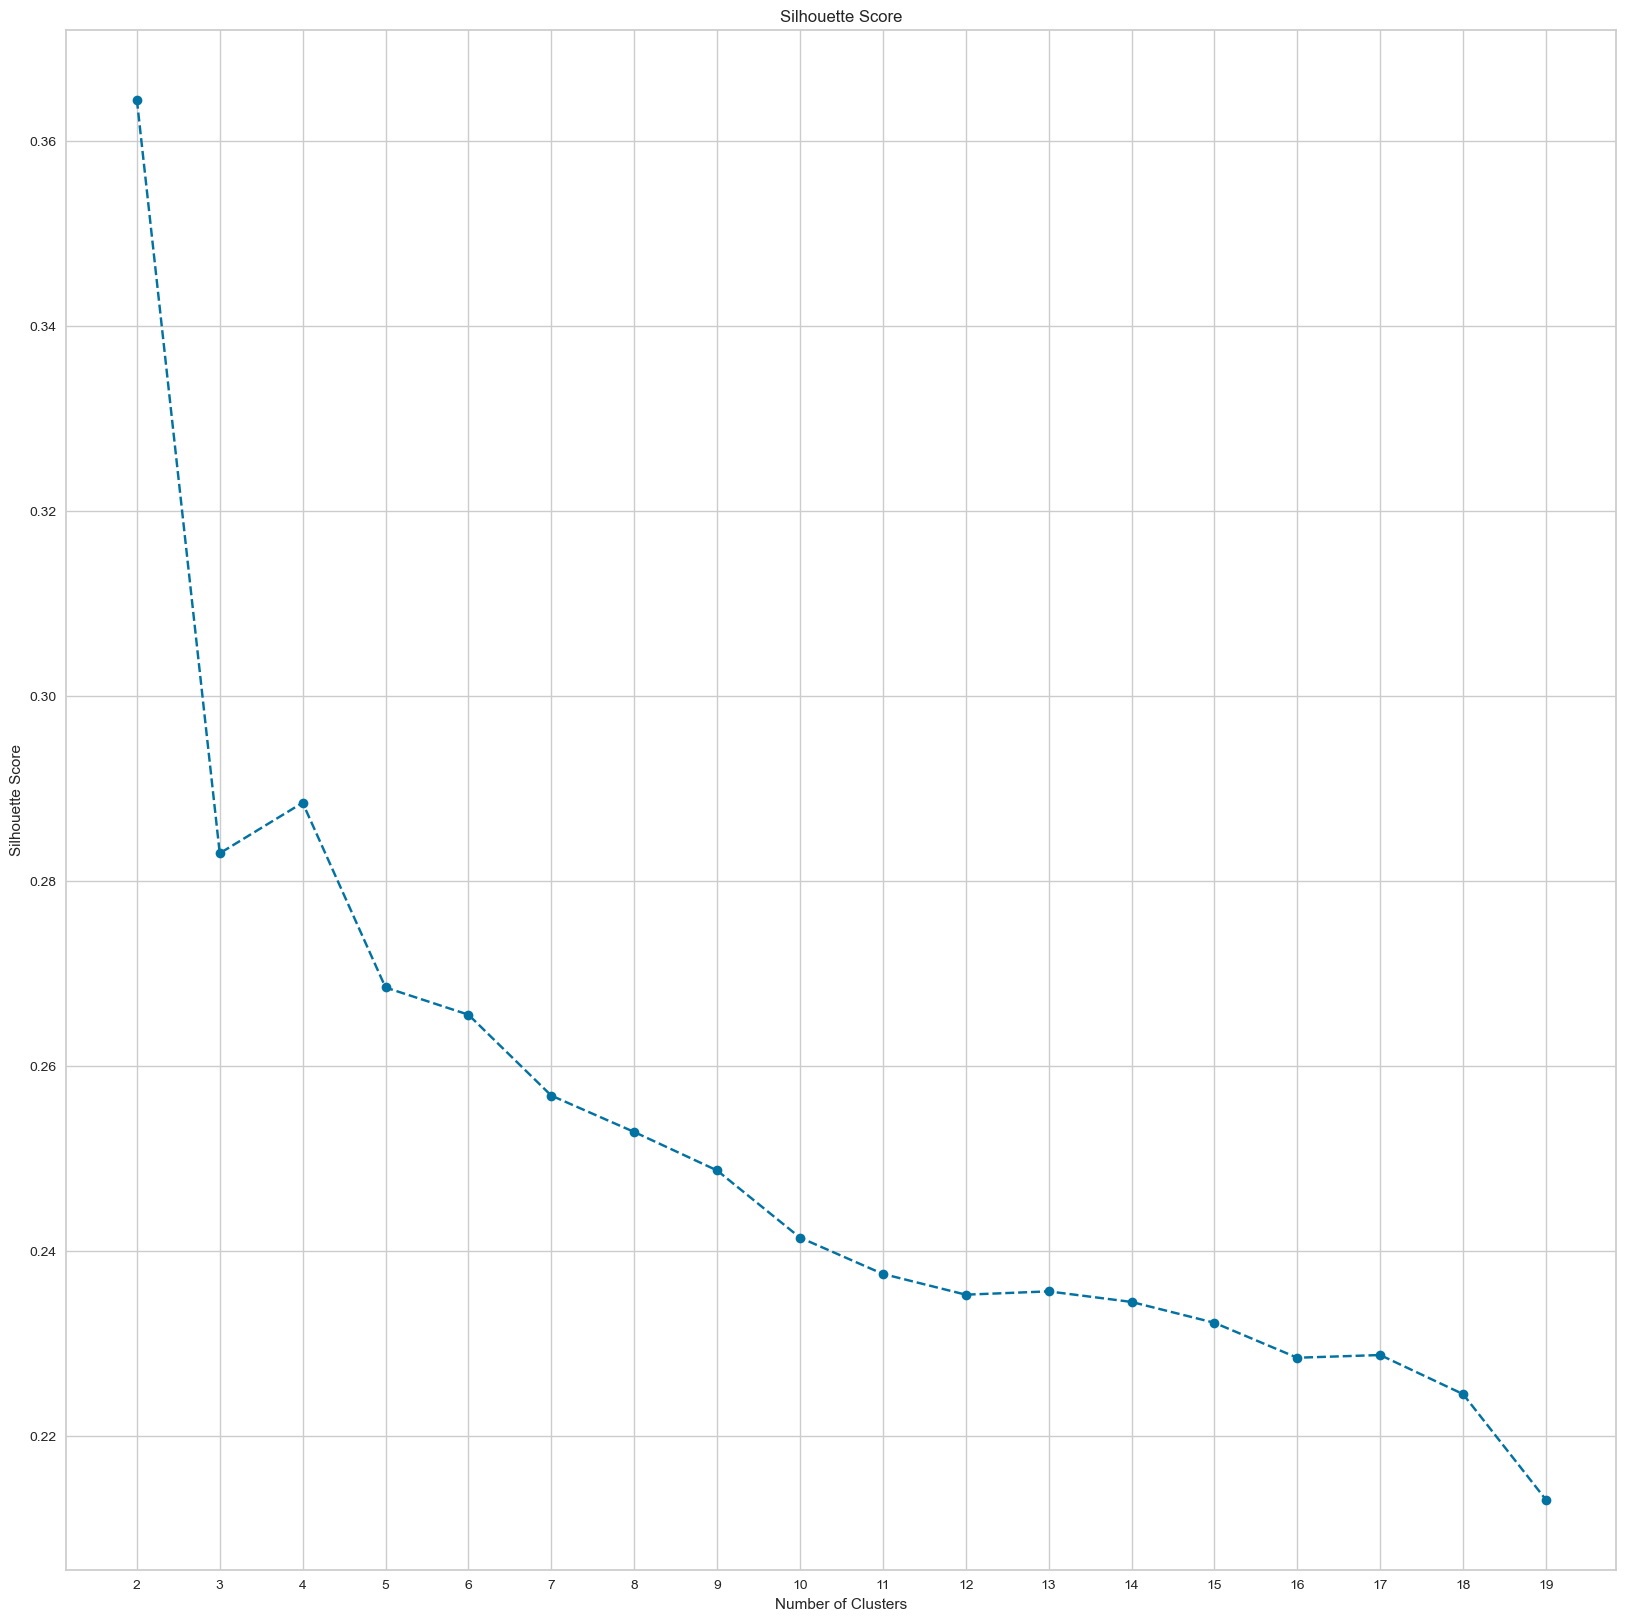

In [217]:
plt.figure(figsize=(20, 20))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.title('Silhouette Score')

plt.show()

In [218]:
df_fighter_scaled.head()

,age,Reach_cms,Weight_lbs,Height_cms
0,-0.660337,-0.438442,-0.239224,-0.040563
1,-0.381862,-0.686357,0.661246,-0.329978
2,1.178203,-1.187988,-0.896757,-1.510445
3,0.677940,-1.441764,-0.561691,-0.621638
4,0.677940,0.773288,0.222823,0.246640


In [219]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

db.fit(df_fighter_scaled)

DBSCAN(eps=3, min_samples=4)

In [220]:
label=db.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [221]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [223]:
df_fighter_pca['cluster'] = label

df_fighter_pca.head()

,PC1,PC2,cluster
0,-0.490443,-0.601508,0
1,-0.260296,-0.236801,0
2,-1.922553,1.453258,0
3,-1.423709,0.894680,0
4,0.795557,0.554551,0


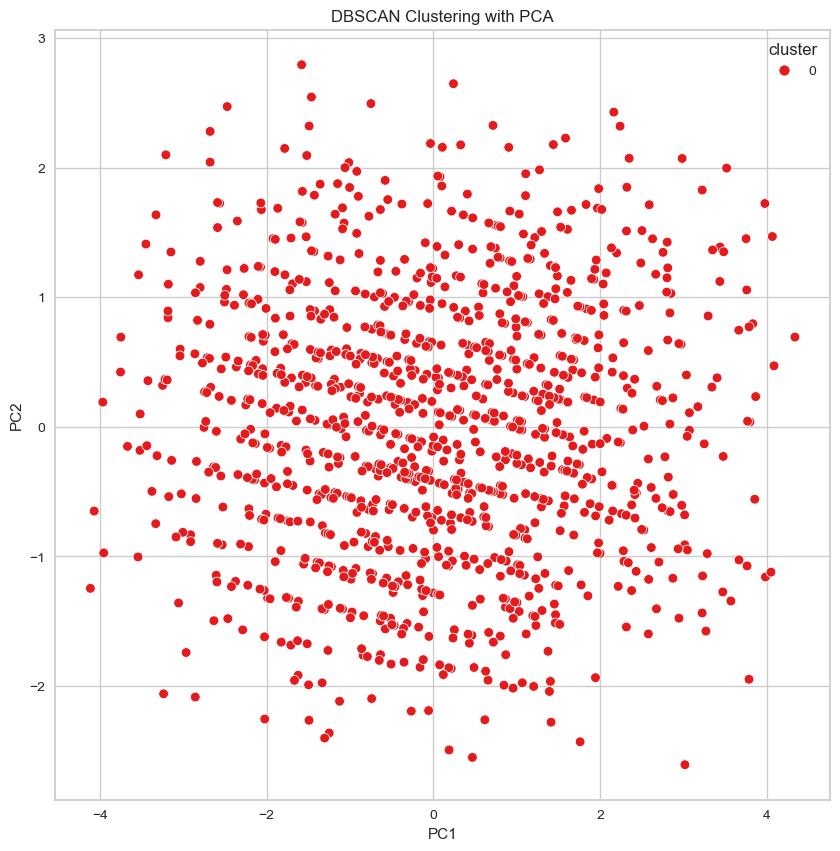

In [224]:
# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("DBSCAN Clustering with PCA")
plt.show()

Notes :
- REV mungkin feature yang ngga terlalu berguna (liat lagi nanti hasil clustering)

Referensi :   
https://www.kaggle.com/code/bagavathypriya/dbscan-clustering  
https://webcache.googleusercontent.com/search?q=cache:https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6&strip=0&vwsrc=1&referer=medium-parser